In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) #視覺圖放大一倍，預設 (8.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
import seaborn as sns
sns.set()
import numpy as np
import re
from pandas.core.frame import DataFrame

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [2]:
#讀入資料
HomeCDT_train=pd.read_csv("../data/application_train.csv")
# HomeCDT_test=pd.read_csv("C:/Shared/Final_topic/home-credit-default-risk/application_test.csv")
# HomeCDT_train=pd.read_csv("D:/BigData/machine_learning/2.5G_home-credit-default-risk/application_train.csv")

In [3]:
def data_unique(data):
    '''data = 資料集
       計算唯一值個數
    '''
    data = data.apply(lambda x:x.unique().shape[0],axis=0)
    print(data)

def set_col_names(data):
    '''data = 資料集
       建立columns names list
    '''
    global col_names
    col_names = []
    col_names = data.columns

def set_col_type(data):
    '''data = 資料集
       建立columns names 列向量的名稱的list
    '''
    global col_type
    col_type = []
    for i in col_names:
        col_type.append(data[i].values.dtype)

def set_col_type_df(col_names, col_type):
    '''建立colums name的資料框
       colum
    '''
    global col_type_df
    col_Dict={"col_names" : col_names,
              "col_type" : col_type}

    col_type_df=DataFrame(col_Dict)
    
def Create_list(columes_type,col):
    '''columes_type = 列欄位的type 型態要是list
       col_names = 列欄位的names 型態要是list
       將不同資料型態放入各自的list，使用到全域變數，整數、物件、浮點數分類
    '''
    global type_Int64 
    global type_object 
    global type_float64 

    type_Int64 = []
    type_object = []
    type_float64 = []
    
    list_tmp = col_type_df["col_type"]
    list_tmp = list_tmp.values.tolist()
    for i in range(len(col_type)):
        if list_tmp[i] == "int64":
            type_Int64.append(col[i])
        elif list_tmp[i] == "O":
            type_object.append(col[i])
        elif list_tmp[i] == "float64":
            type_float64.append(col[i])
            
def set_train_null(data):
    '''data = 資料集
       挑選出有空值的欄位
       判斷是否有空值
    '''
    global train_null
    count_null = data.isnull().any()
    train_null = data.isnull().sum()[count_null==True]
    
def plot_null_hist(train_null):
    '''train_null = 放入有空值的columns 名稱及個數
       針對空直項目畫直方分布圖，程式設計不佳有時候會有報錯
    '''
    plt.figure(figsize=(20,60), dpi=80)

    k = 0
    for i in range(0, 8, 2):
        for j in range(2):
            plt.subplot2grid((8,2),(i,j))
            train_null[k*10:(k+1)*10].plot(kind='bar')
            k += 1
            if i == 6:
                break
    plt.show()
    
def plot_int_hist(data, type_Int64):
    '''type_int64 放入type_Int64 型態的columns names
       畫出int類型的直方分布圖
    '''
    for i in range(len(type_Int64)):
        fig,axes = plt.subplots()
        data[type_Int64[i]].plot.hist(bins=50,ax=axes)
        axes.set_title(type_Int64[i])
        
def coefficient(data, type_float64):
    '''type_float64 放入type_float64 型態的columns names
       float64 合併目標項並計算相關係數
    '''
    global corDf
    type_float64_df = data[type_float64]
    type_float64_df["TARGET"] = data["TARGET"]

    corDf=type_float64_df.corr()
    print(corDf["TARGET"])
    
def plot_coefficient(data, type_float64):
    '''type_float64 放入type_float64 型態的columns names
       畫出相關係數熱圖
    '''
    type_float64_df = data[type_float64]
    type_float64_df["TARGET"] = data["TARGET"]
    plt.figure(figsize=(100, 100))

    g=sns.heatmap(np.abs(corDf), vmin=0., vmax=1., linewidths=0.01,
                square=True,annot=True,cmap='YlGnBu',linecolor="white")
    plt.title('Correlation between features');
    
def plot_pie_chart(type_object, data):
    '''type_object = 放入type_object 型態的columns names
       data = 資料集
       畫圓餅圖,需要有type_object,針對object
    '''
    for j in type_object:
        list_unique = data[j].unique().tolist()
        print("")
        print("")
        print(j)
        for i in range (0,len(list_unique)):
            print ( list_unique[i], ' : ',(list_unique[i] == data[j].values ).sum().tolist() ,sep='' )
            num=[]
        for i in range (0,len(list_unique)):
            num.append((list_unique[i] == data[j].values ).sum().tolist())
            lab=list(zip(list_unique,num))
        plt.pie( num, labels = lab , autopct = '%1.1f%%')
        plt.axis('equal')
        plt.show()

In [4]:
HomeCDT_train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [5]:
len(HomeCDT_train['SK_ID_CURR'])

307511

In [10]:
#計算唯一值個數 train
data_unique(HomeCDT_train)

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13673
AMT_GOODS_PRICE                   1003
NAME_TYPE_SUITE                      8
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         63
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [11]:
#建立列欄位名稱的 list
set_col_names(HomeCDT_train)
col_names

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
#建立 type of column list
set_col_type(HomeCDT_train)
col_type

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [13]:
#合併 col_names 和 col_type 變成 Dataframe
set_col_type_df(col_names, col_type)
col_type_df

col_names col_type
0                      SK_ID_CURR    int64
1                          TARGET    int64
2              NAME_CONTRACT_TYPE   object
3                     CODE_GENDER   object
4                    FLAG_OWN_CAR   object
5                 FLAG_OWN_REALTY   object
6                    CNT_CHILDREN    int64
7                AMT_INCOME_TOTAL  float64
8                      AMT_CREDIT  float64
9                     AMT_ANNUITY  float64
10                AMT_GOODS_PRICE  float64
11                NAME_TYPE_SUITE   object
12               NAME_INCOME_TYPE   object
13            NAME_EDUCATION_TYPE   object
14             NAME_FAMILY_STATUS   object
15              NAME_HOUSING_TYPE   object
16     REGION_POPULATION_RELATIVE  float64
17                     DAYS_BIRTH    int64
18                  DAYS_EMPLOYED    int64
19              DAYS_REGISTRATION  float64
20                DAYS_ID_PUBLISH    int64
21                    OWN_CAR_AGE  float64
22                     FLAG_MOBIL    int64
23                 FLAG_EMP_PHONE    int64
24                FLAG_WORK_PHONE    int64
25               FLAG_CONT_MOBILE    int64
26                     FLAG_PHONE    int64
27                     FLAG_EMAIL    int64
28                OCCUPATION_TYPE   object
29                CNT_FAM_MEMBERS  float64
30           REGION_RATING_CLIENT    int64
31    REGION_RATING_CLIENT_W_CITY    int64
32     WEEKDAY_APPR_PROCESS_START   object
33        HOUR_APPR_PROCESS_START    int64
34     REG_REGION_NOT_LIVE_REGION    int64
35     REG_REGION_NOT_WORK_REGION    int64
36    LIVE_REGION_NOT_WORK_REGION    int64
37         REG_CITY_NOT_LIVE_CITY    int64
38         REG_CITY_NOT_WORK_CITY    int64
39        LIVE_CITY_NOT_WORK_CITY    int64
40              ORGANIZATION_TYPE   object
41                   EXT_SOURCE_1  float64
42                   EXT_SOURCE_2  float64
43                   EXT_SOURCE_3  float64
44                 APARTMENTS_AVG  float64
45               BASEMENTAREA_AVG  float64
46    YEARS_BEGINEXPLUATATION_AVG  float64
47                YEARS_BUILD_AVG  float64
48                 COMMONAREA_AVG  float64
49                  ELEVATORS_AVG  float64
50                  ENTRANCES_AVG  float64
51                  FLOORSMAX_AVG  float64
52                  FLOORSMIN_AVG  float64
53                   LANDAREA_AVG  float64
54           LIVINGAPARTMENTS_AVG  float64
55                 LIVINGAREA_AVG  float64
56        NONLIVINGAPARTMENTS_AVG  float64
57              NONLIVINGAREA_AVG  float64
58                APARTMENTS_MODE  float64
59              BASEMENTAREA_MODE  float64
60   YEARS_BEGINEXPLUATATION_MODE  float64
61               YEARS_BUILD_MODE  float64
62                COMMONAREA_MODE  float64
63                 ELEVATORS_MODE  float64
64                 ENTRANCES_MODE  float64
65                 FLOORSMAX_MODE  float64
66                 FLOORSMIN_MODE  float64
67                  LANDAREA_MODE  float64
68          LIVINGAPARTMENTS_MODE  float64
69                LIVINGAREA_MODE  float64
70       NONLIVINGAPARTMENTS_MODE  float64
71             NONLIVINGAREA_MODE  float64
72                APARTMENTS_MEDI  float64
73              BASEMENTAREA_MEDI  float64
74   YEARS_BEGINEXPLUATATION_MEDI  float64
75               YEARS_BUILD_MEDI  float64
76                COMMONAREA_MEDI  float64
77                 ELEVATORS_MEDI  float64
78                 ENTRANCES_MEDI  float64
79                 FLOORSMAX_MEDI  float64
80                 FLOORSMIN_MEDI  float64
81                  LANDAREA_MEDI  float64
82          LIVINGAPARTMENTS_MEDI  float64
83                LIVINGAREA_MEDI  float64
84       NONLIVINGAPARTMENTS_MEDI  float64
85             NONLIVINGAREA_MEDI  float64
86             FONDKAPREMONT_MODE   object
87                 HOUSETYPE_MODE   object
88                 TOTALAREA_MODE  float64
89             WALLSMATERIAL_MODE   object
90            EMERGENCYSTATE_MODE   object
91       OBS_30_CNT_SOCIAL_CIRCLE  float64
92       DEF_30_CNT_SOCIA

In [14]:
#將不同資料型態放入各自的list，使用到全域變數，應該能有不用到全域變數的方法
#整數、物件、浮點數分類
Create_list(col_type,col_names)
type_Int64
# type_float64
# type_object

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [17]:
#挑選出有空值的欄位
#判斷是否有空值
set_train_null(HomeCDT_train)
# set_train_null.__doc__
train_null

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

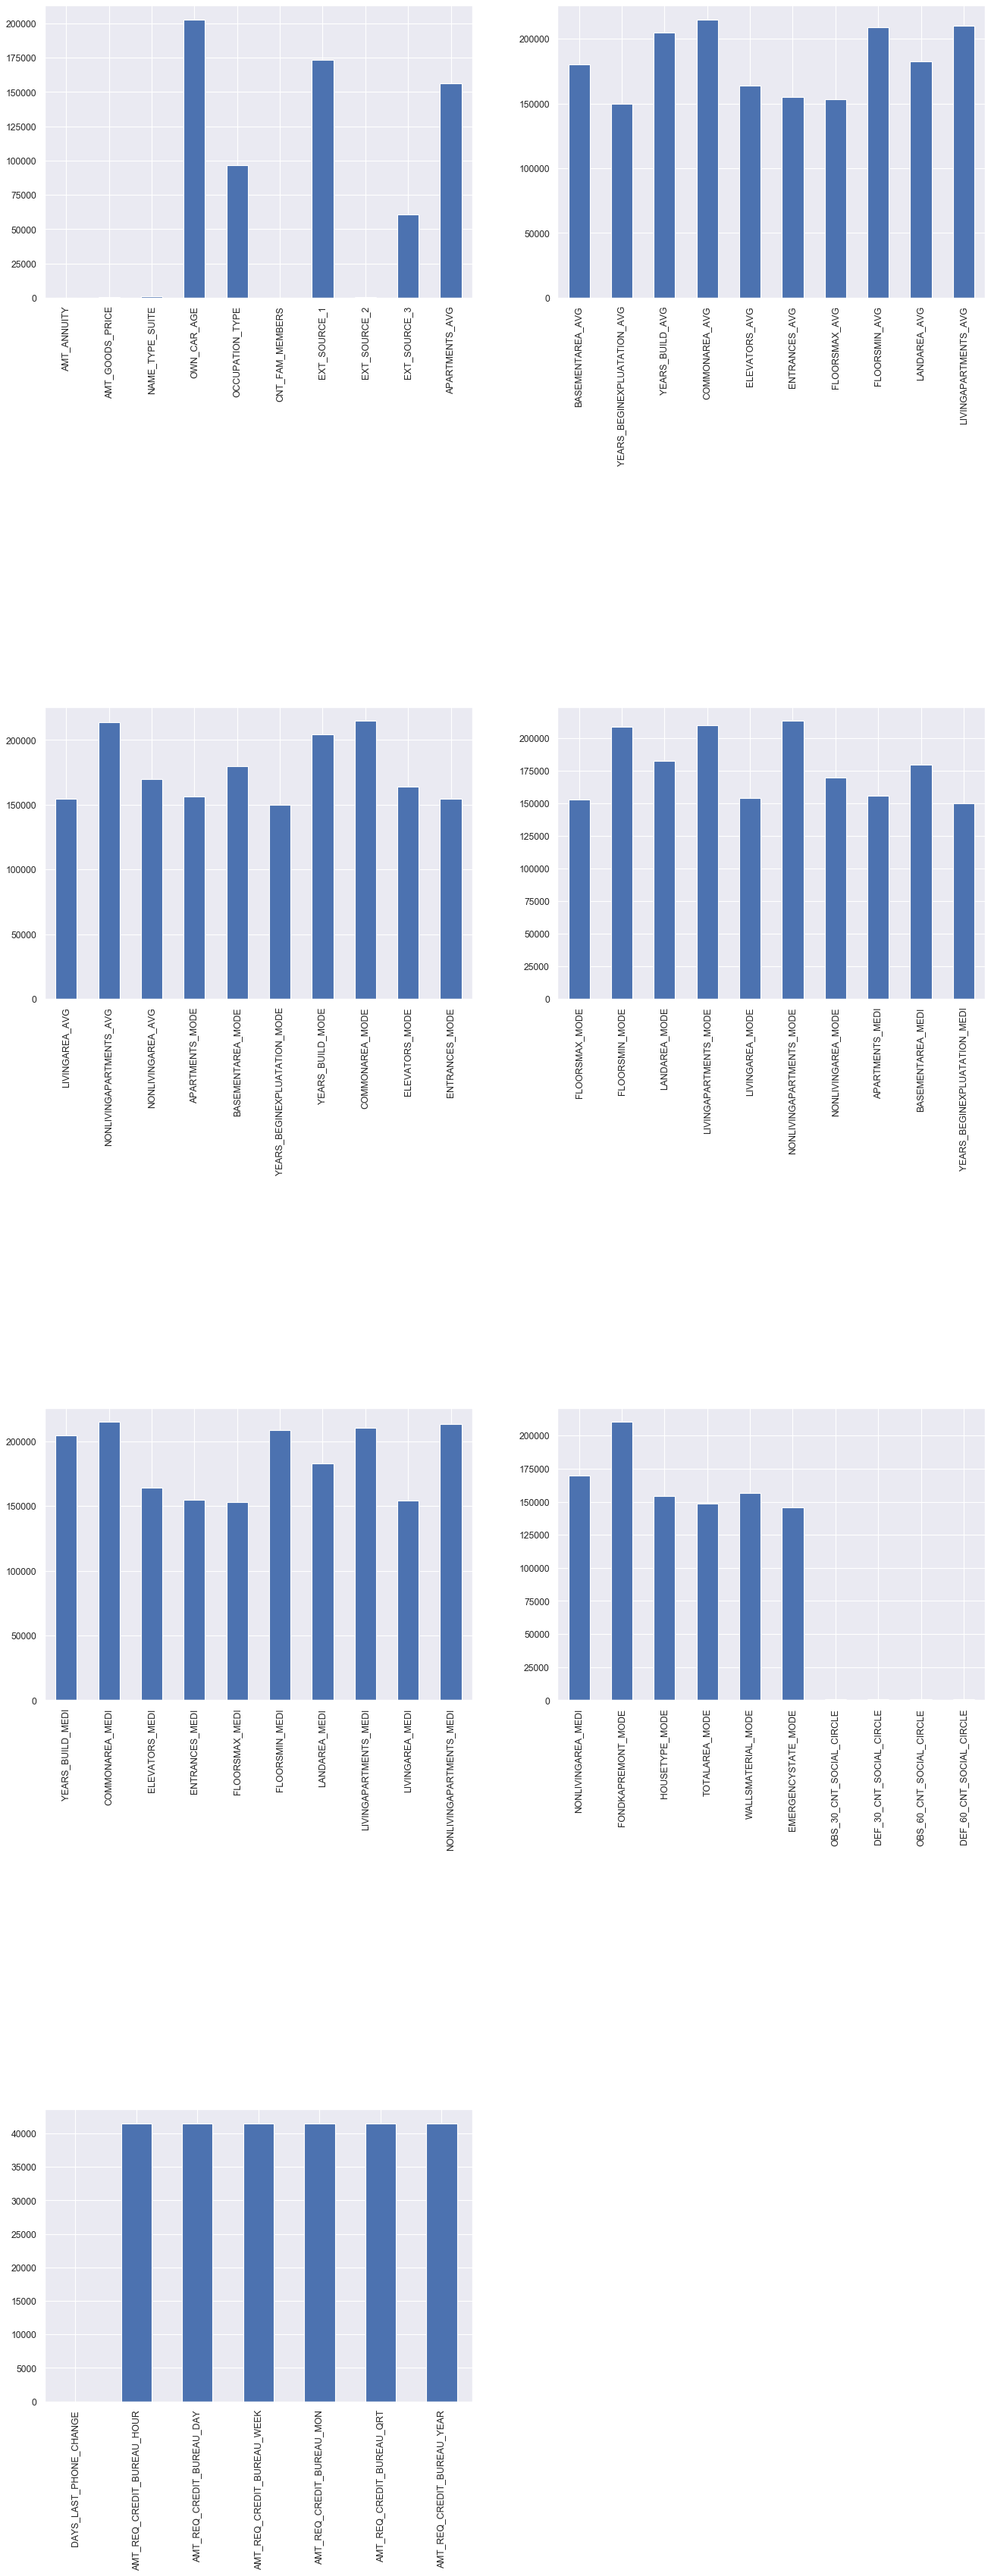

In [18]:
#針對空值看空值數目
#畫圖
plot_null_hist(train_null)

C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


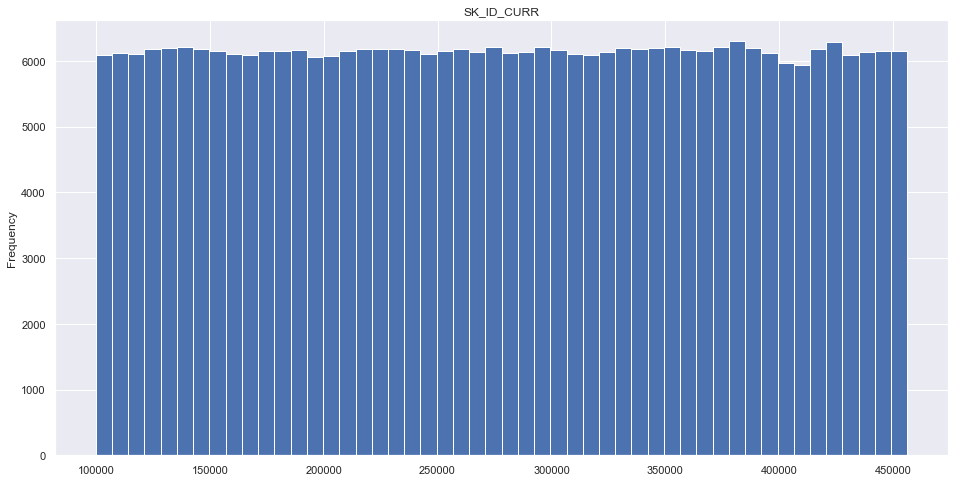

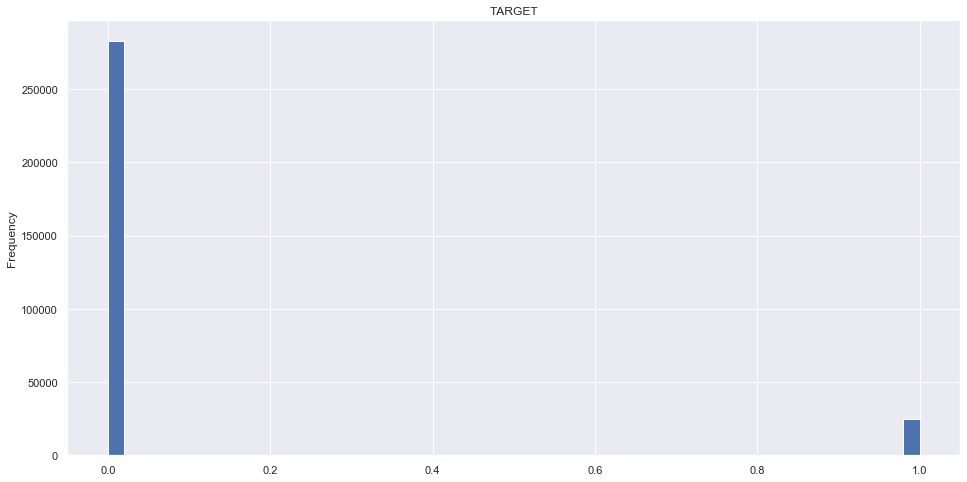

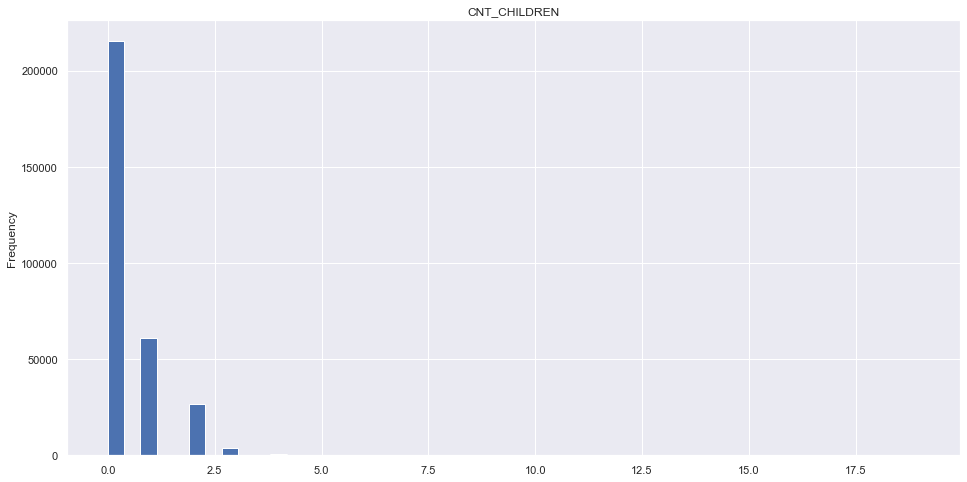

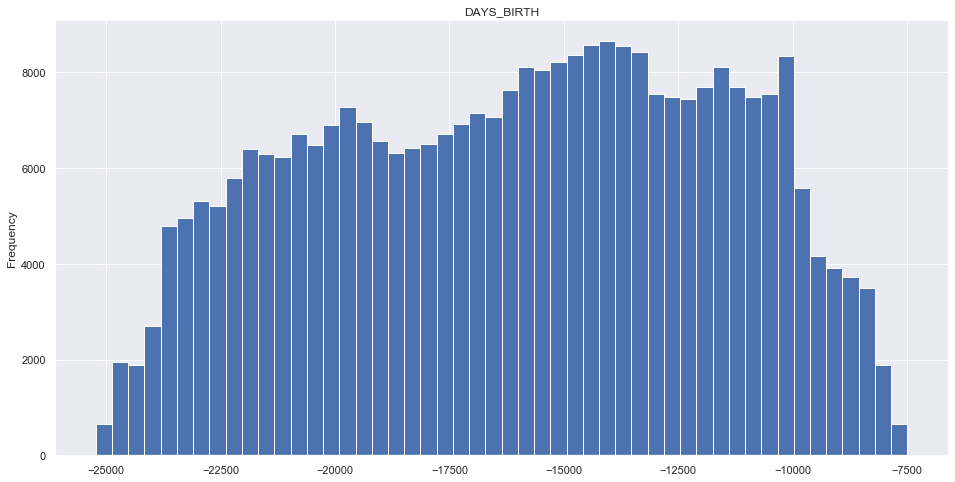

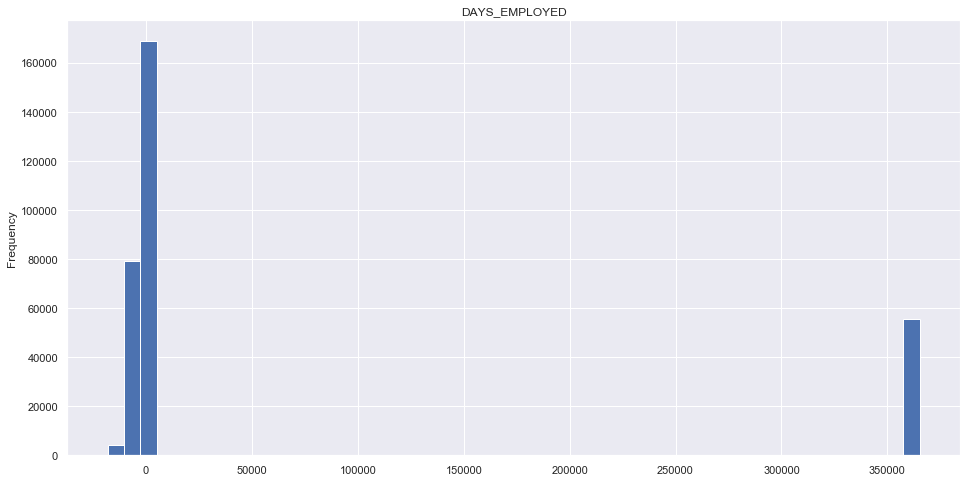

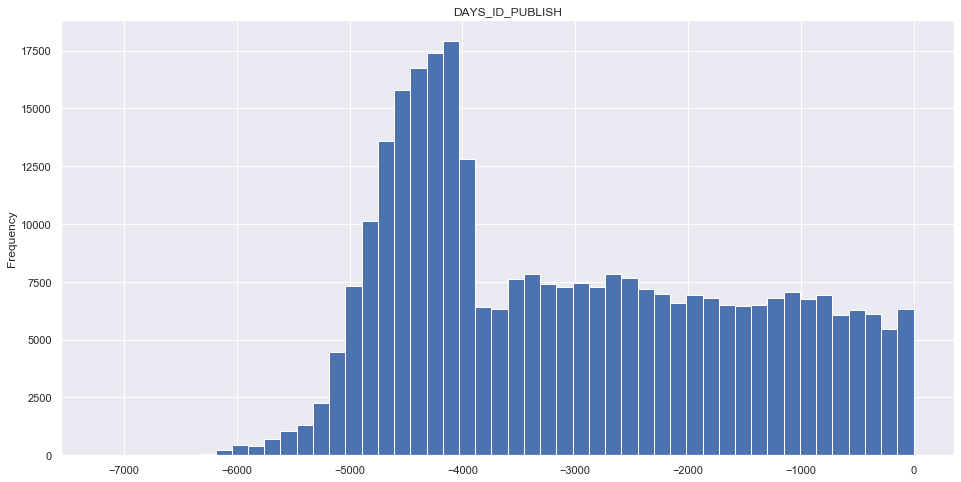

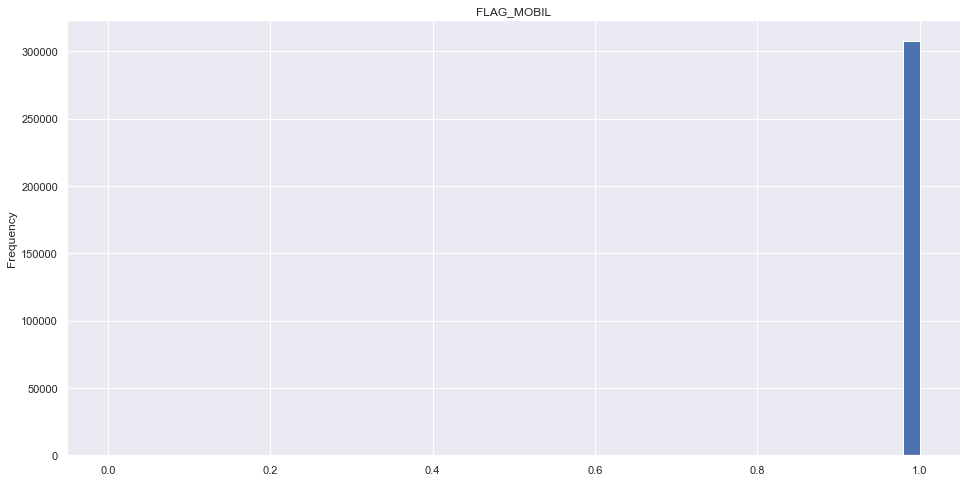

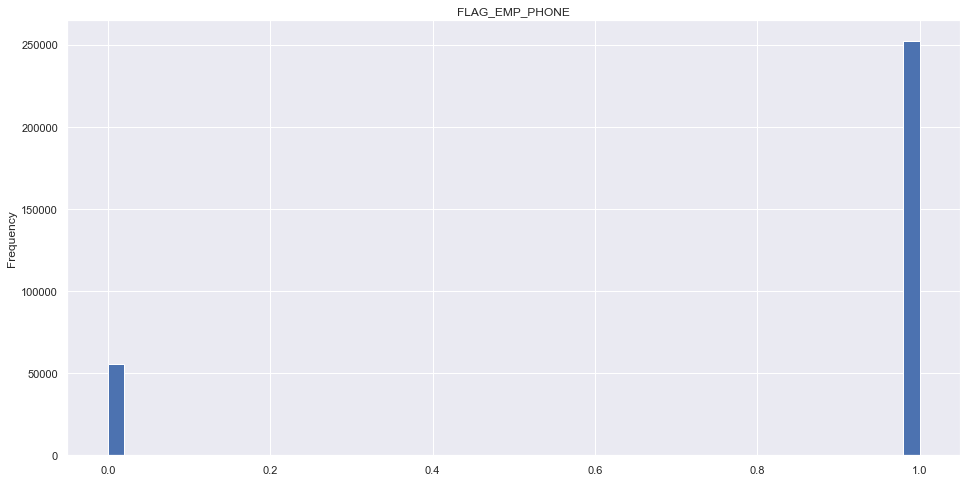

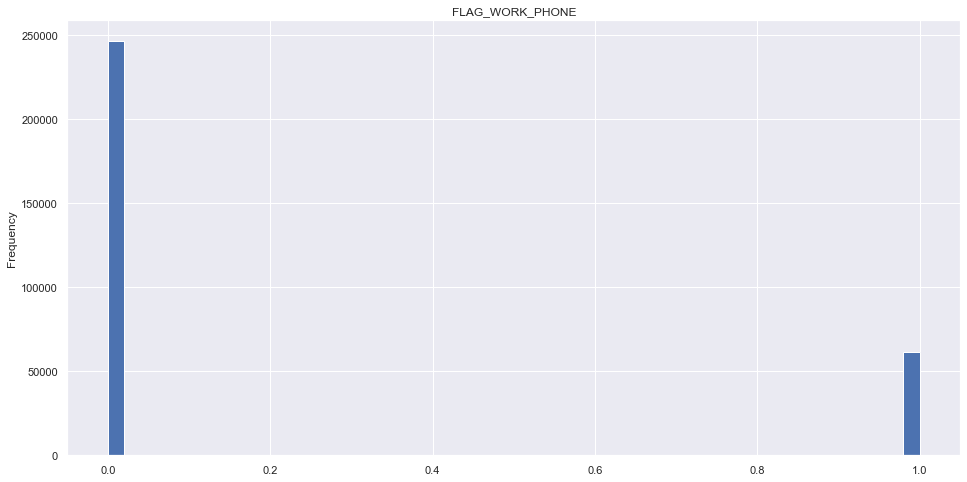

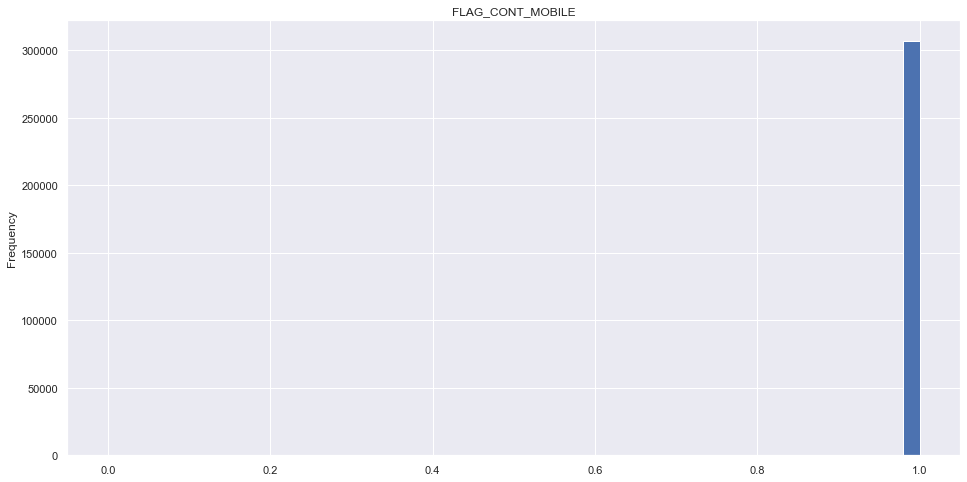

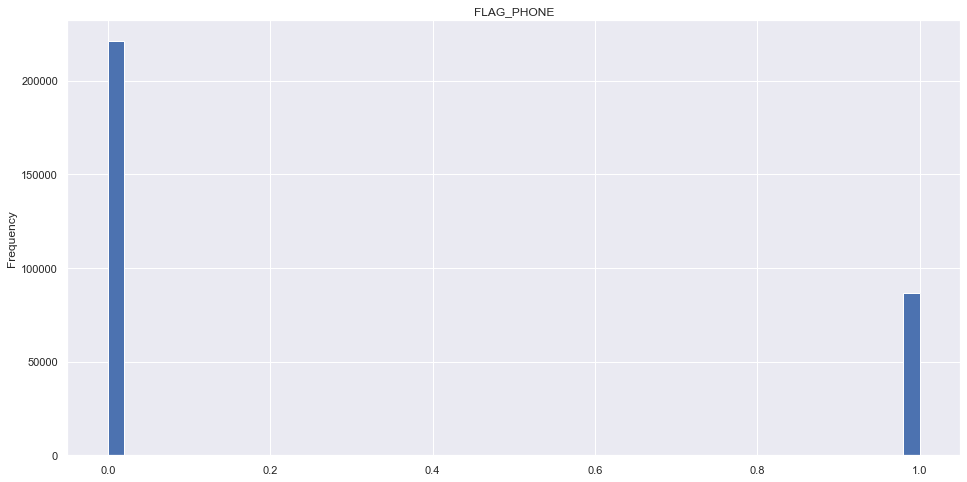

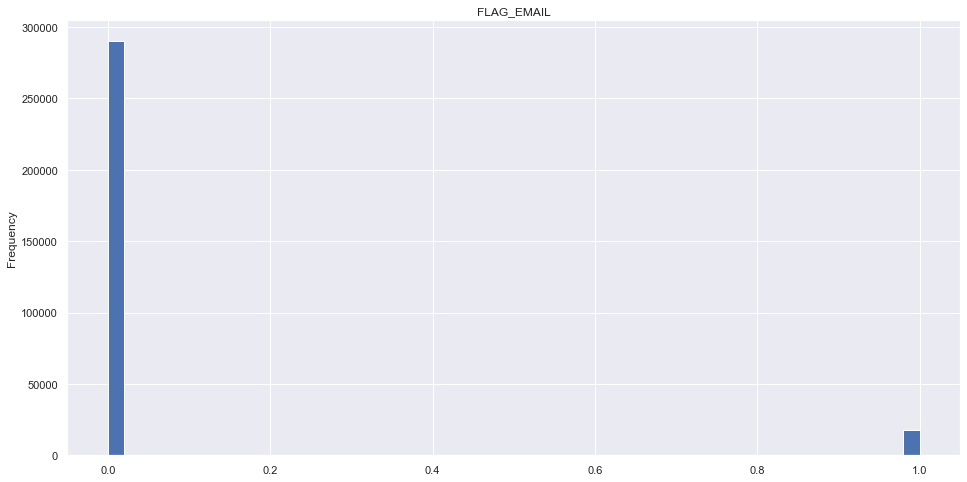

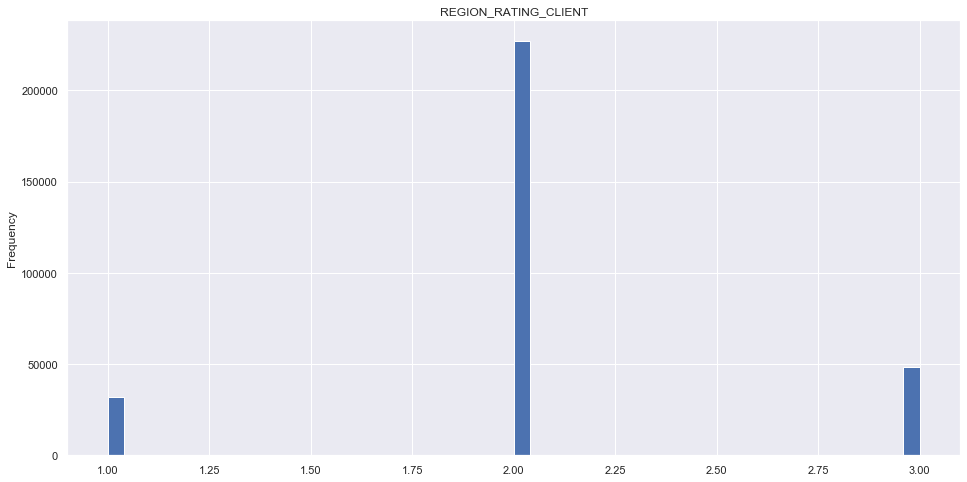

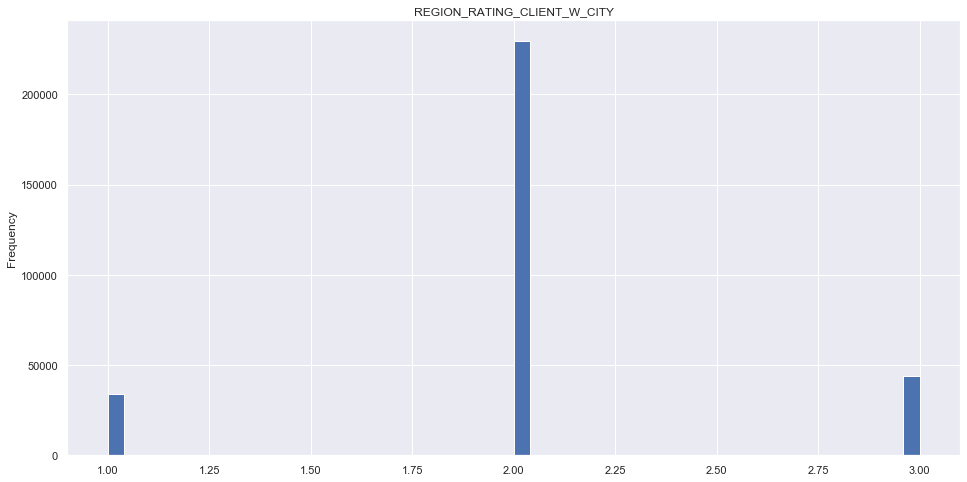

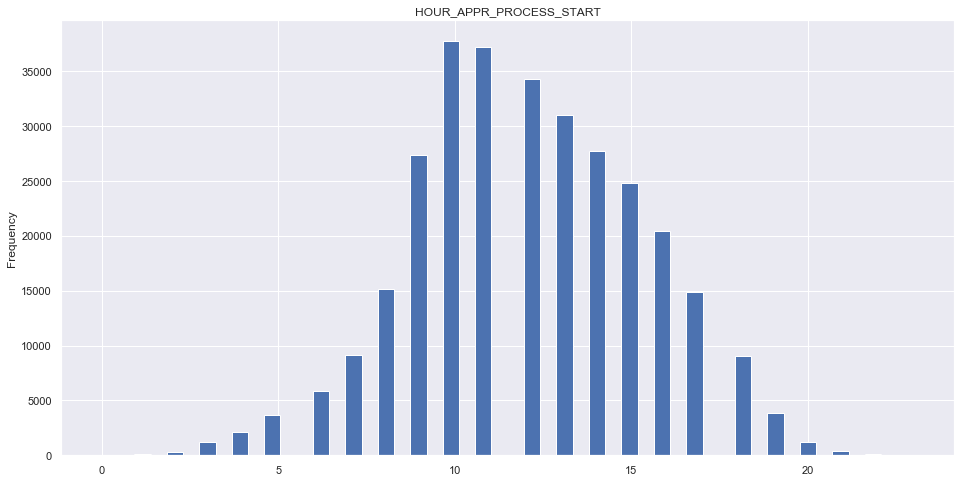

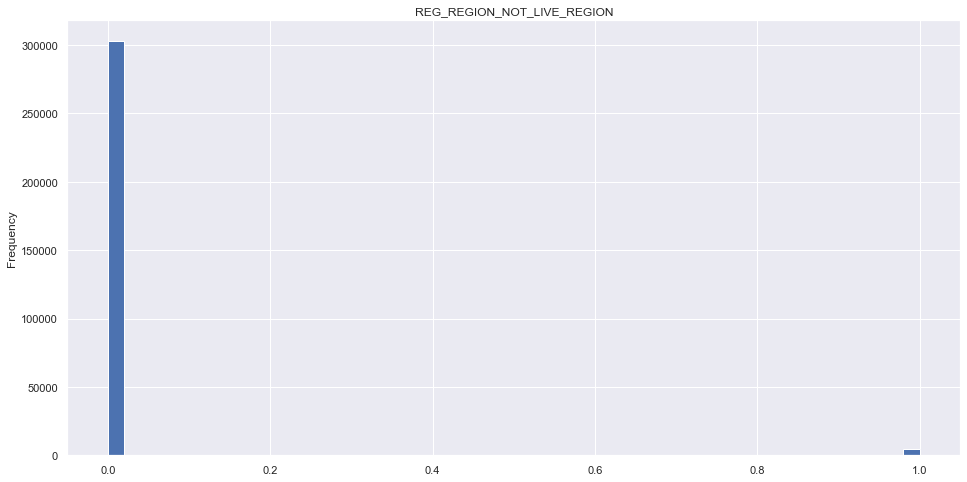

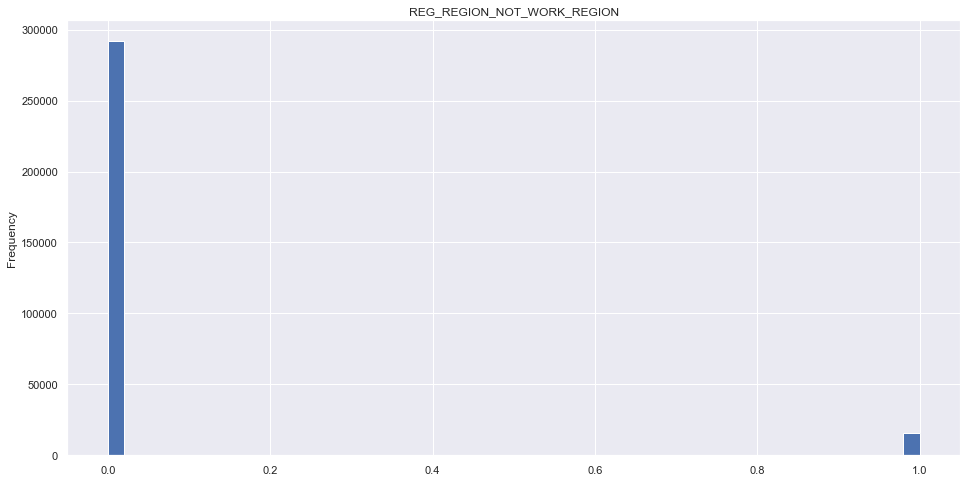

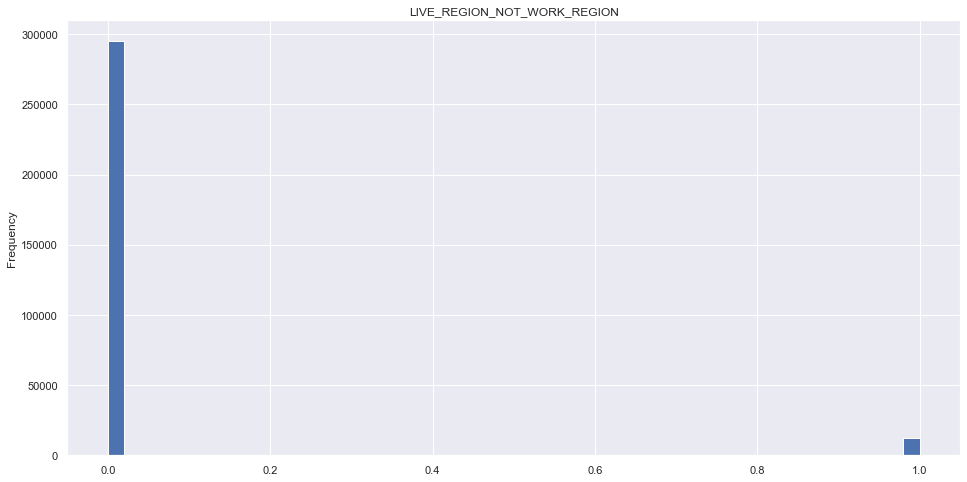

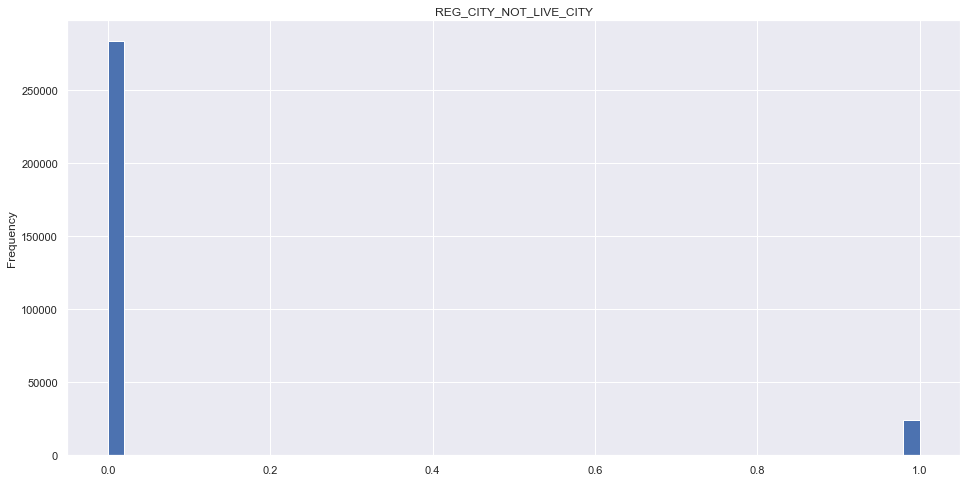

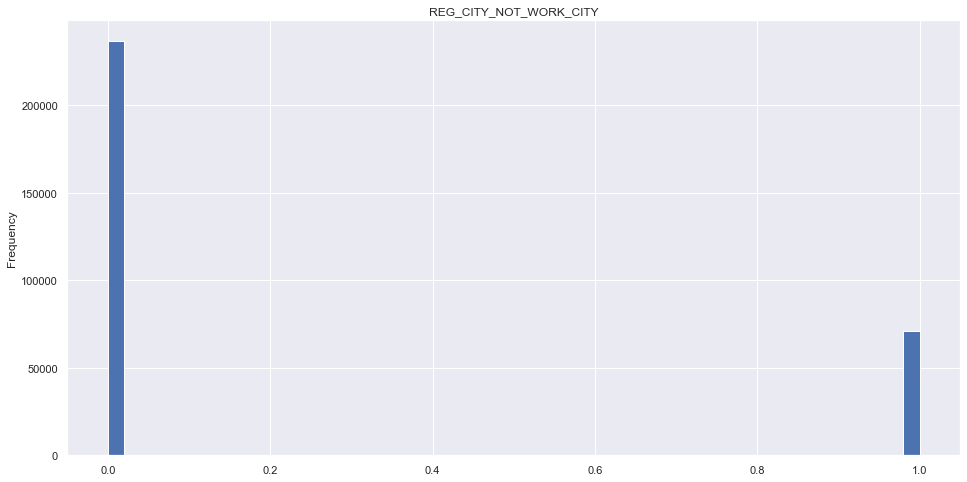

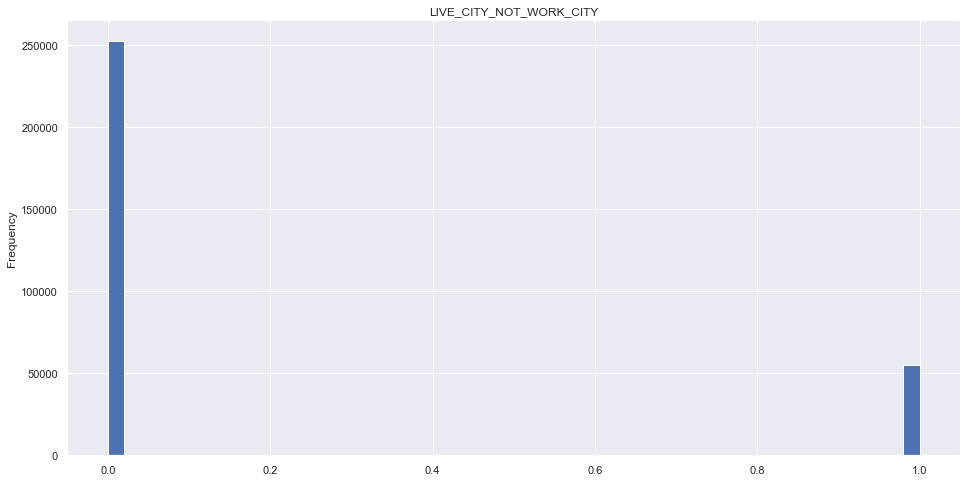

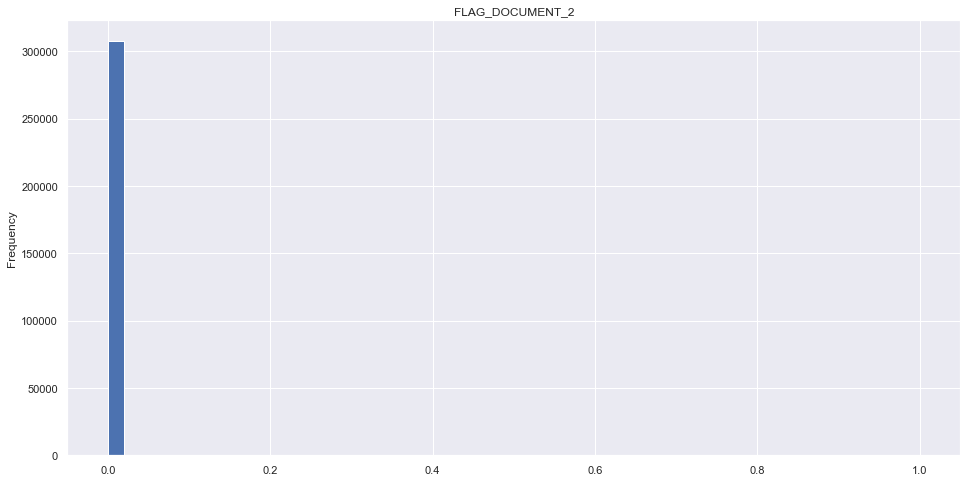

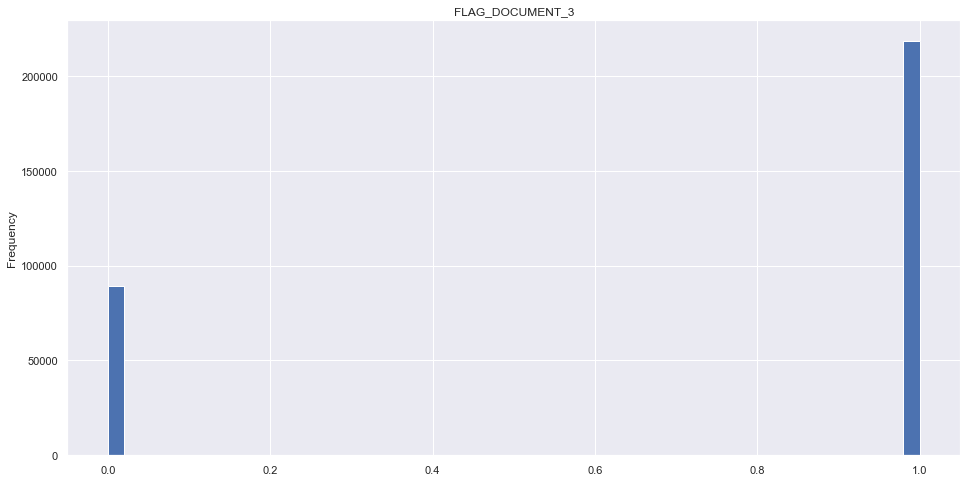

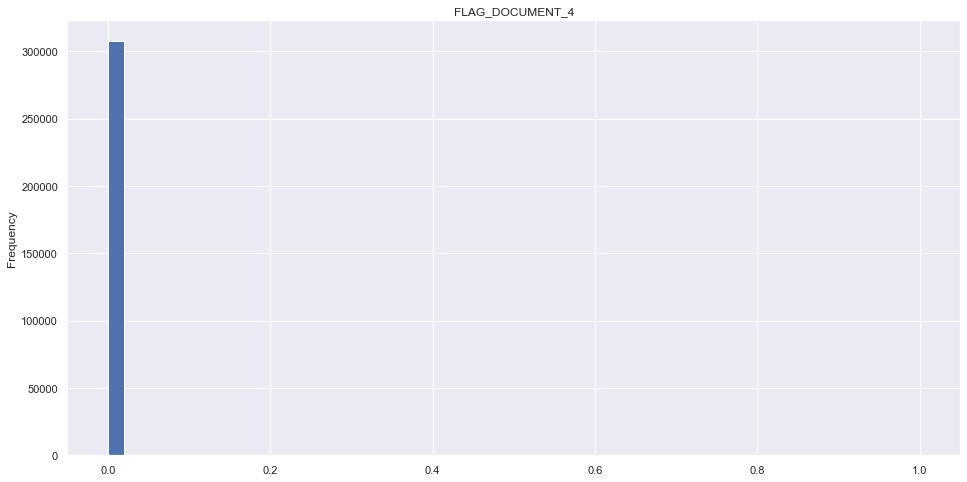

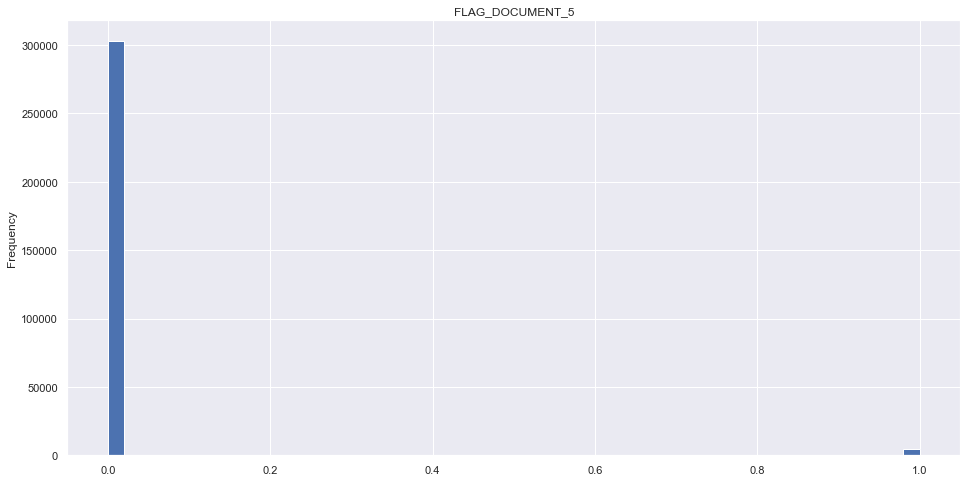

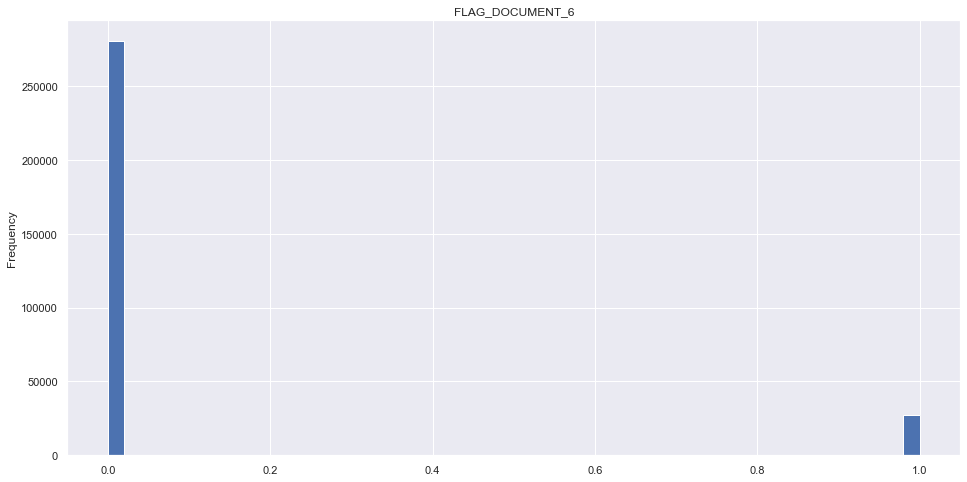

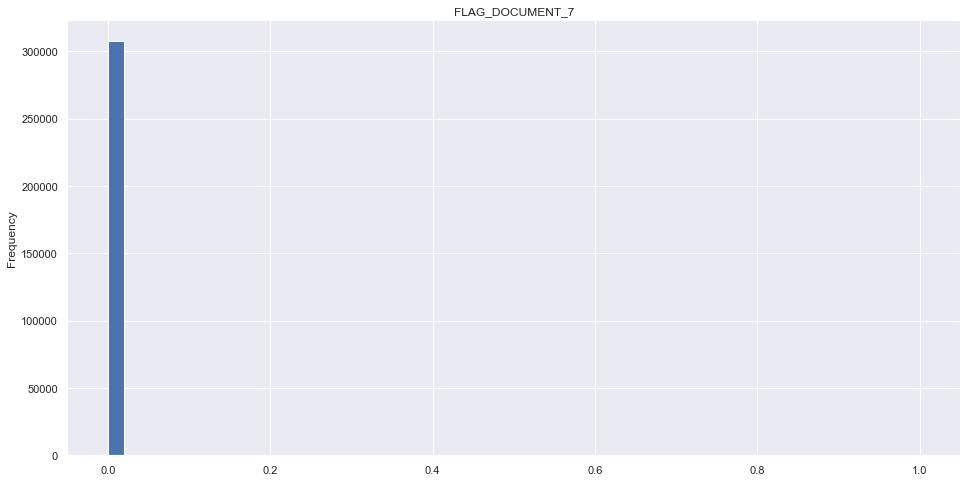

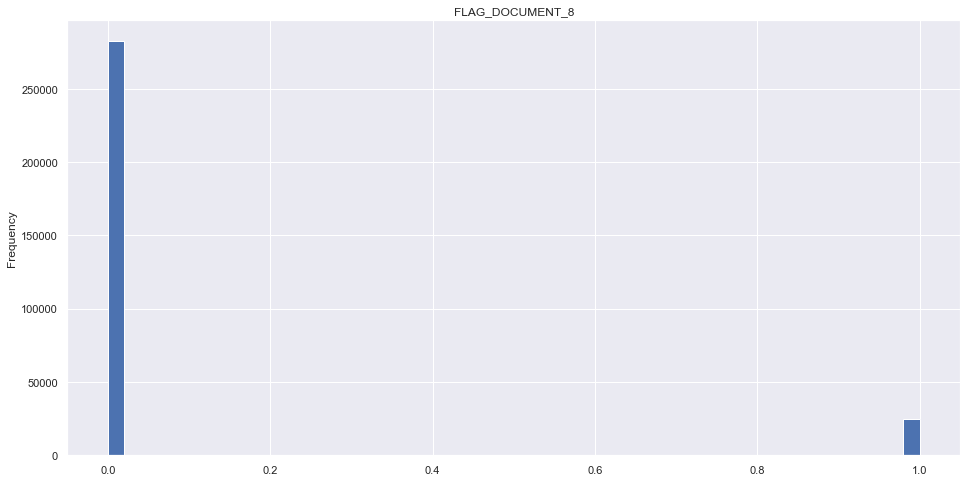

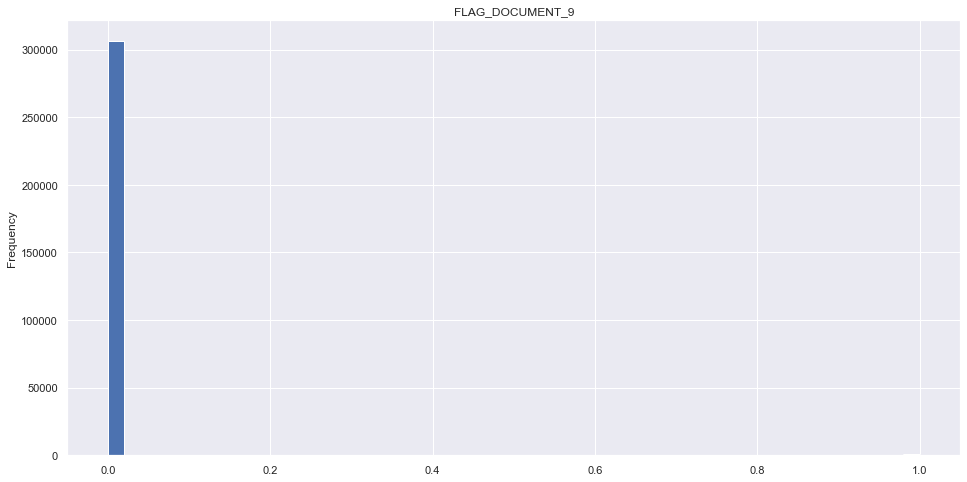

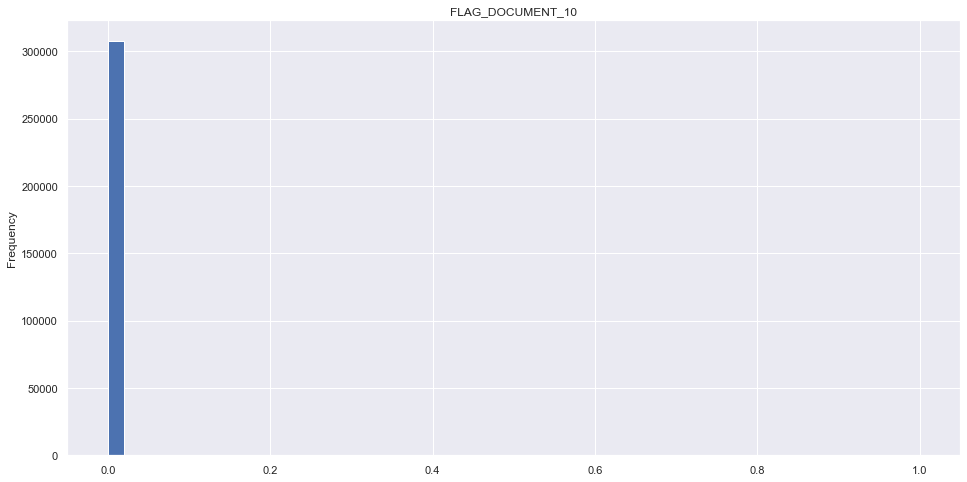

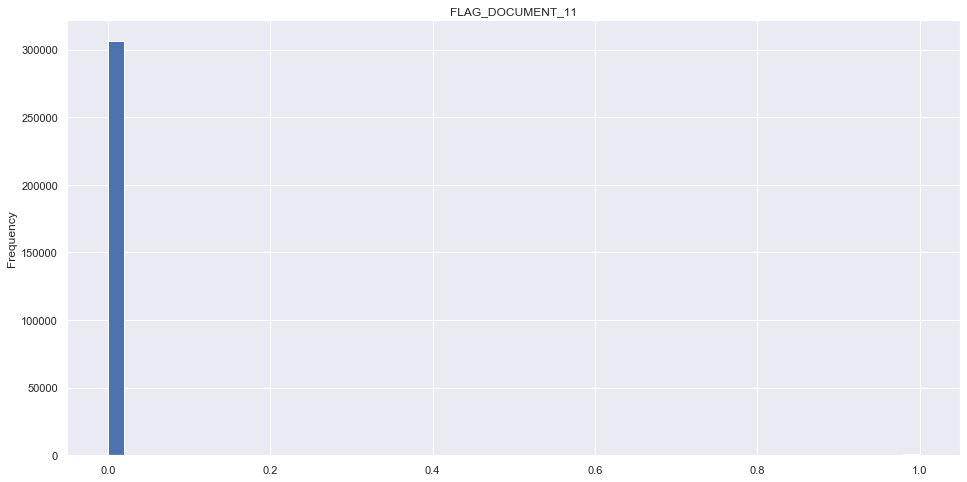

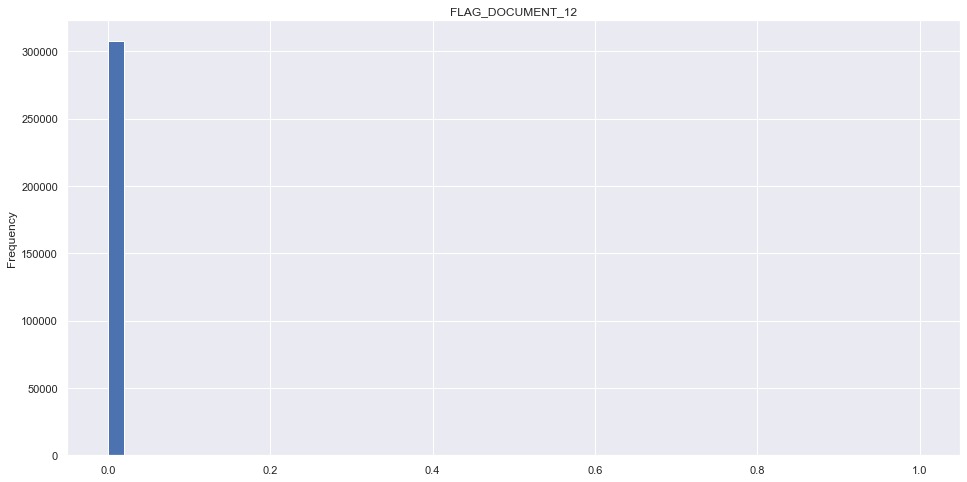

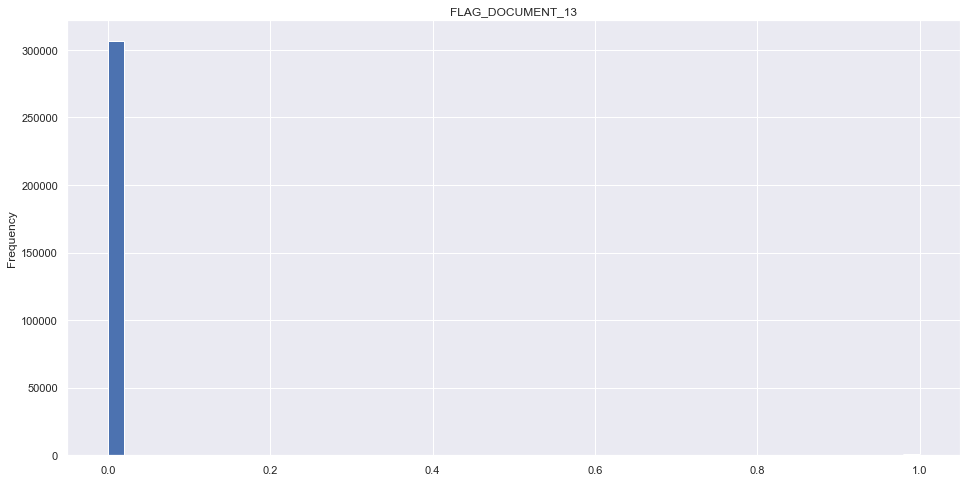

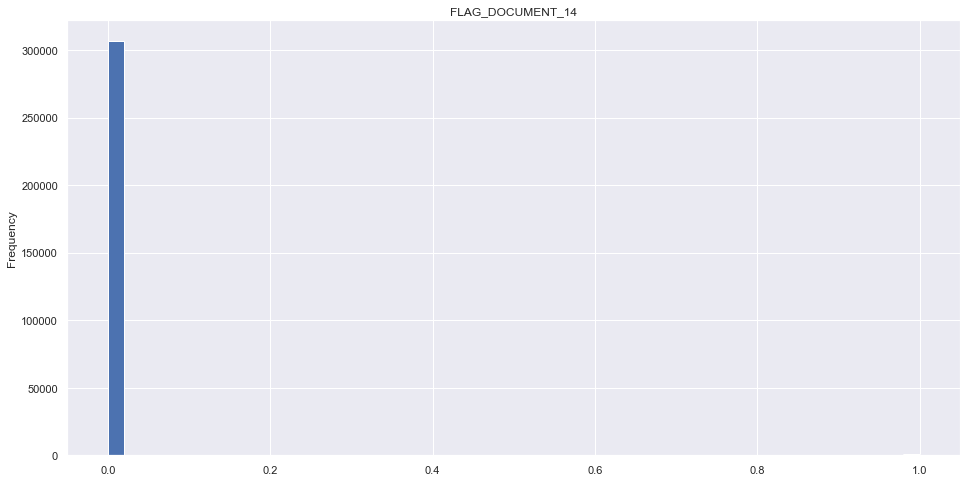

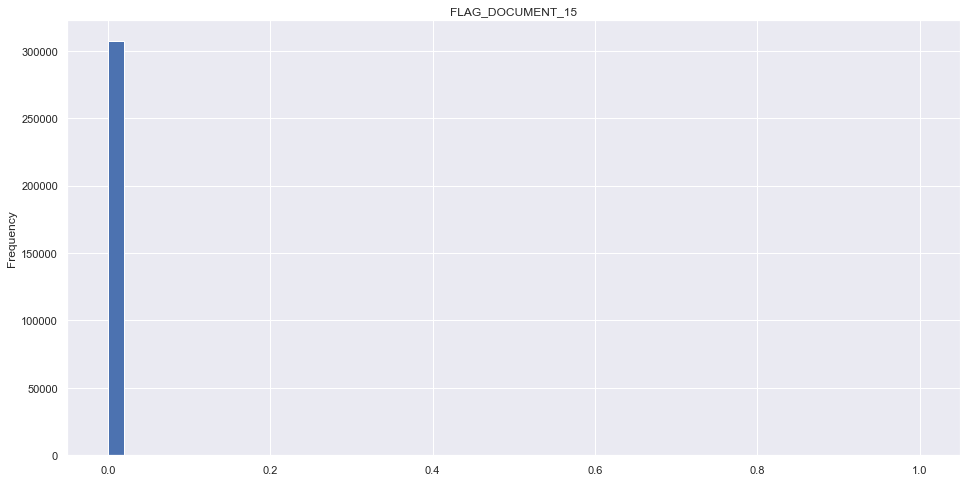

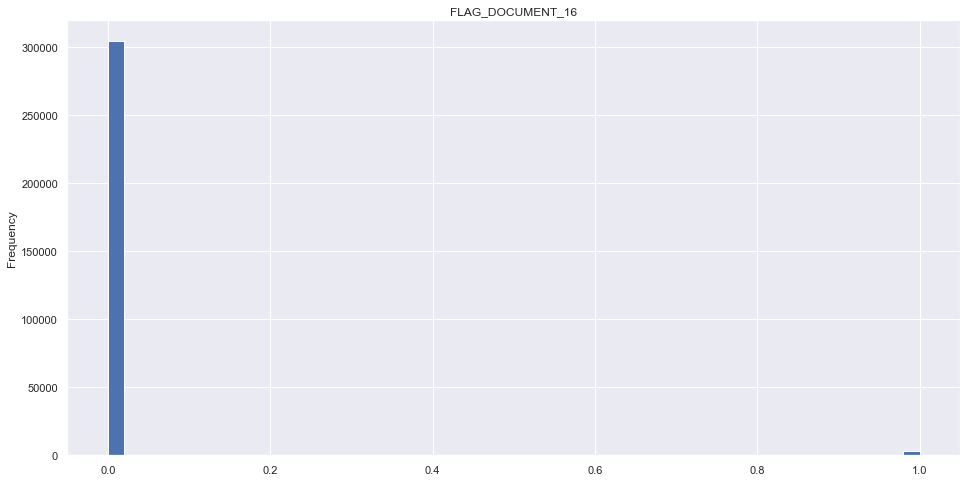

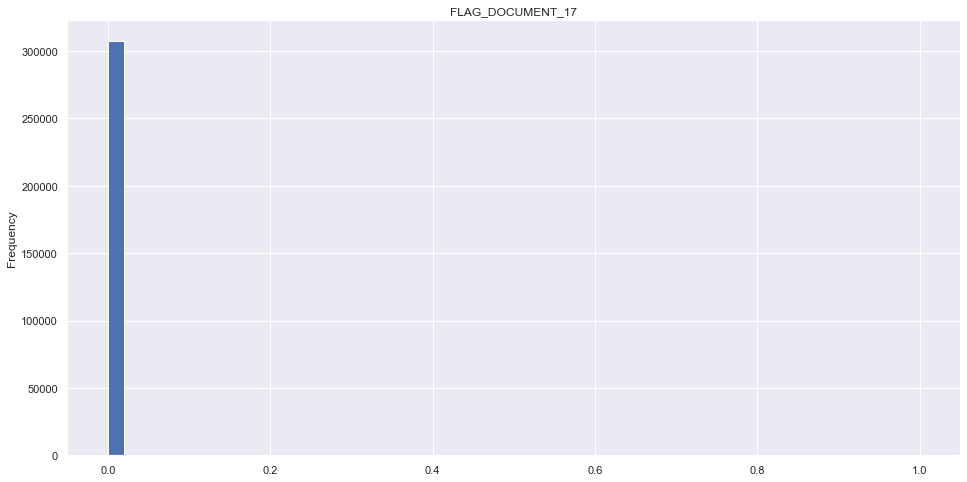

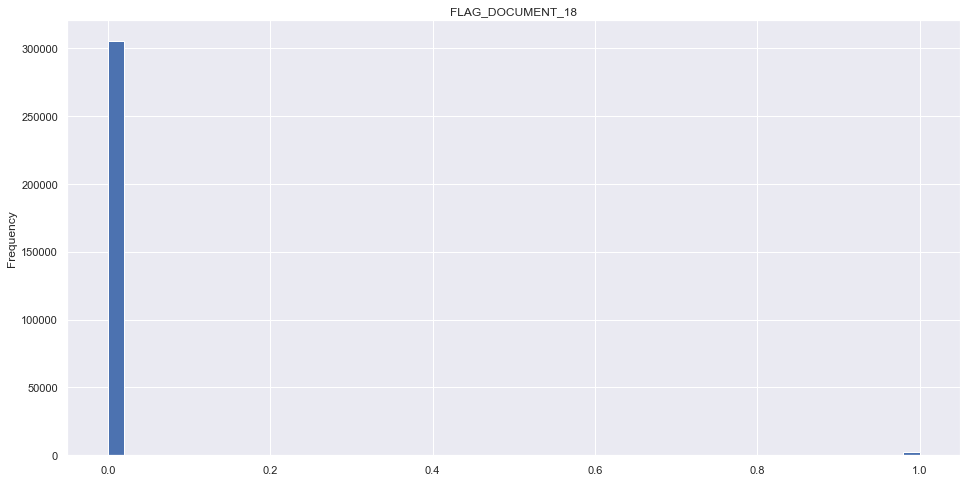

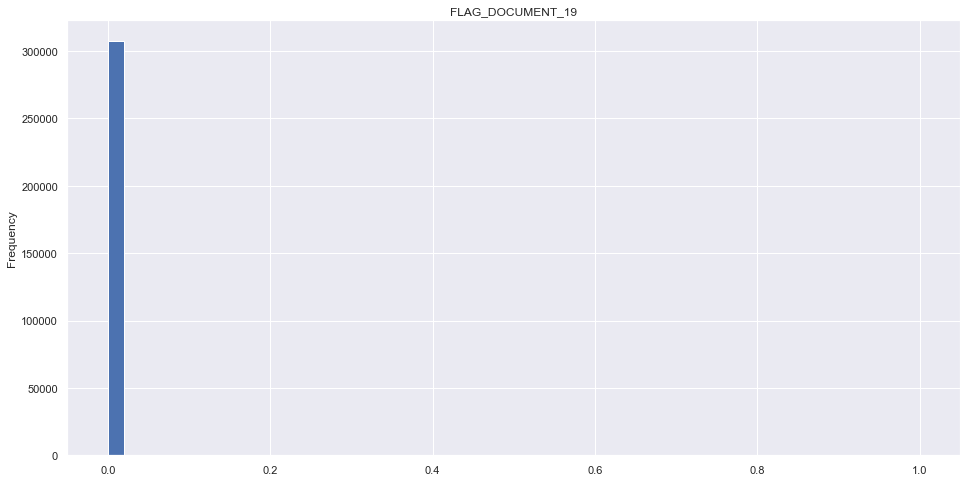

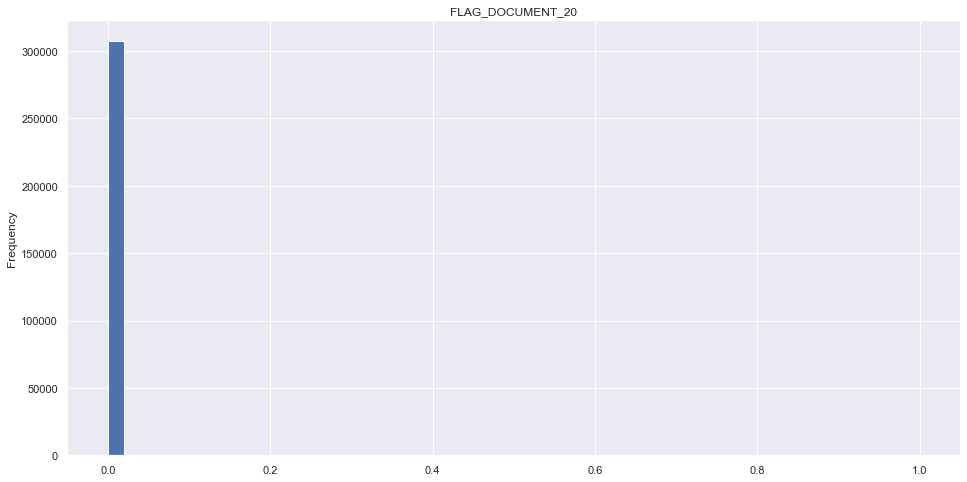

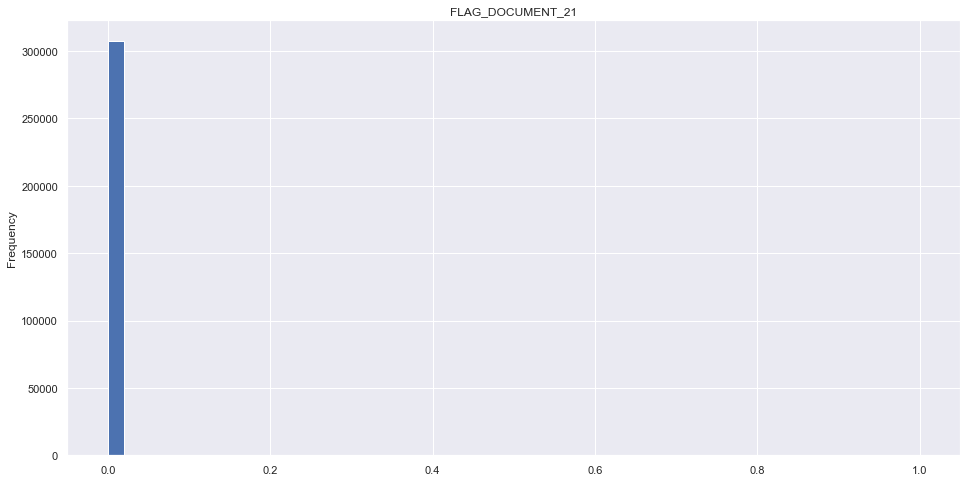

In [20]:
#數值型看分佈圖
plot_int_hist(HomeCDT_train, type_Int64)

C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


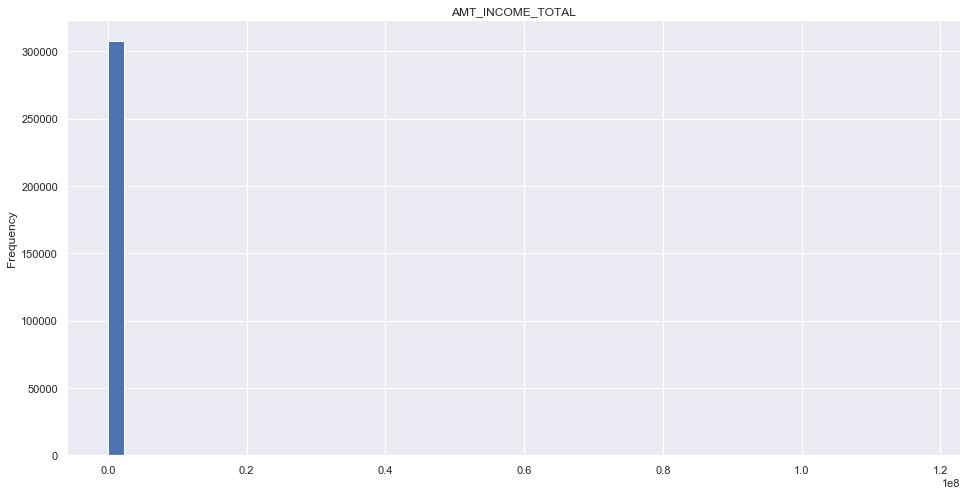

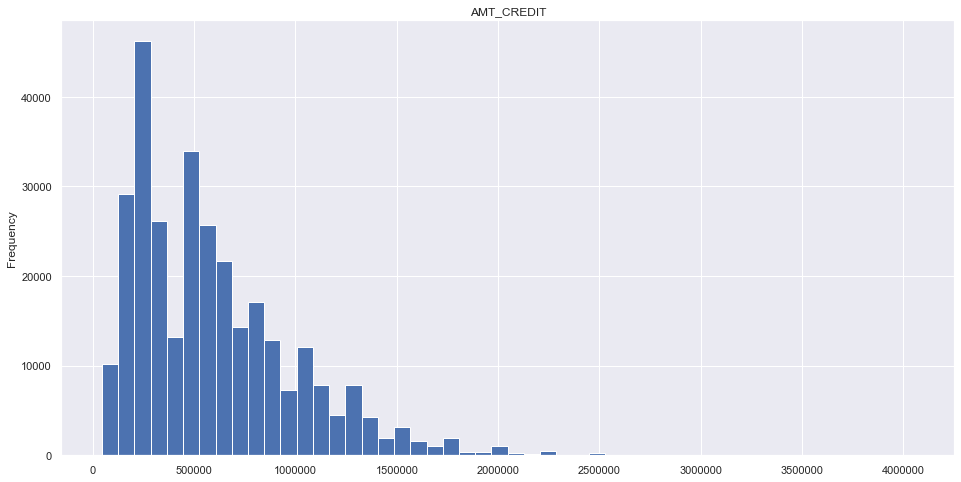

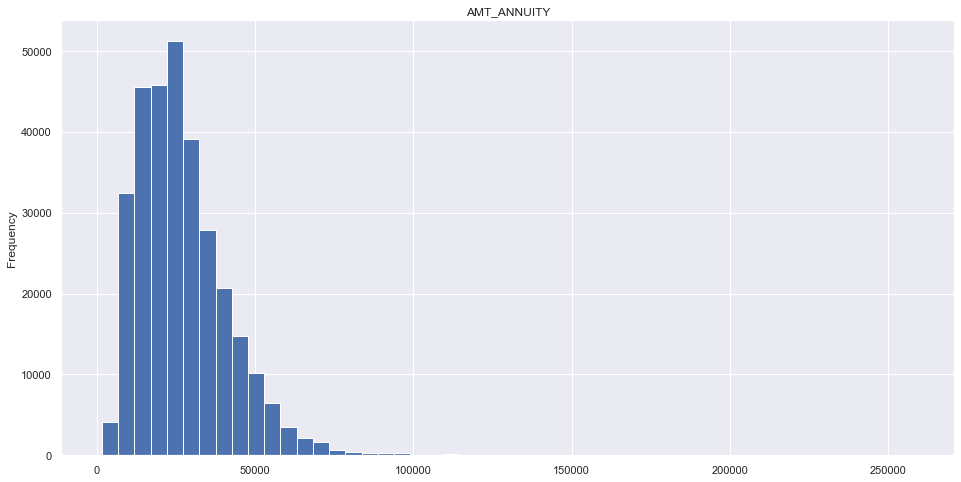

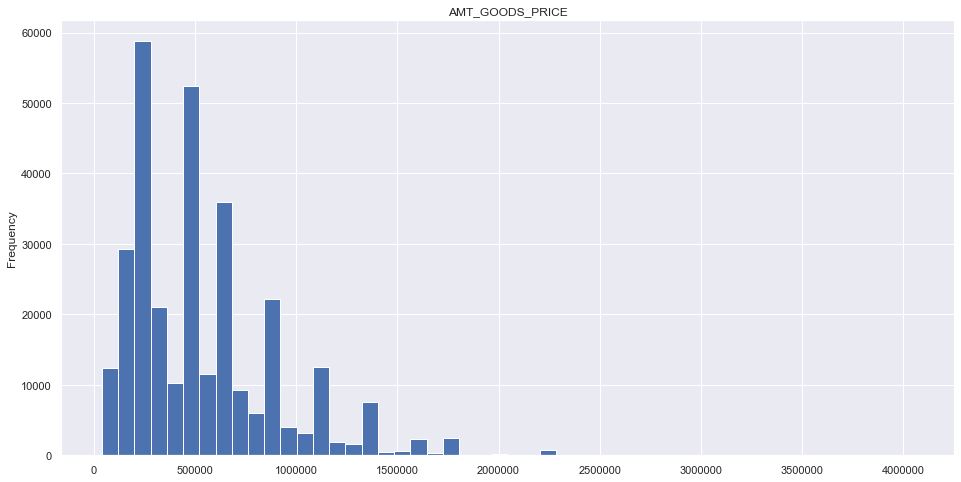

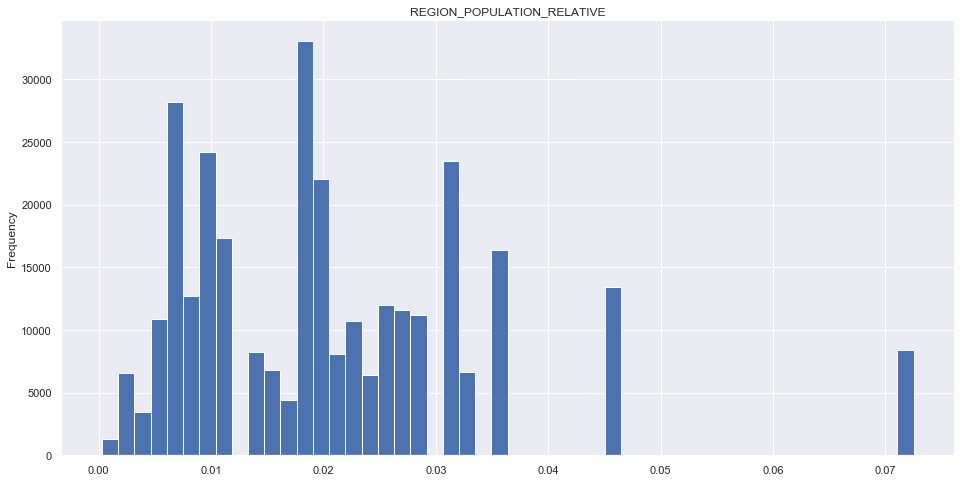

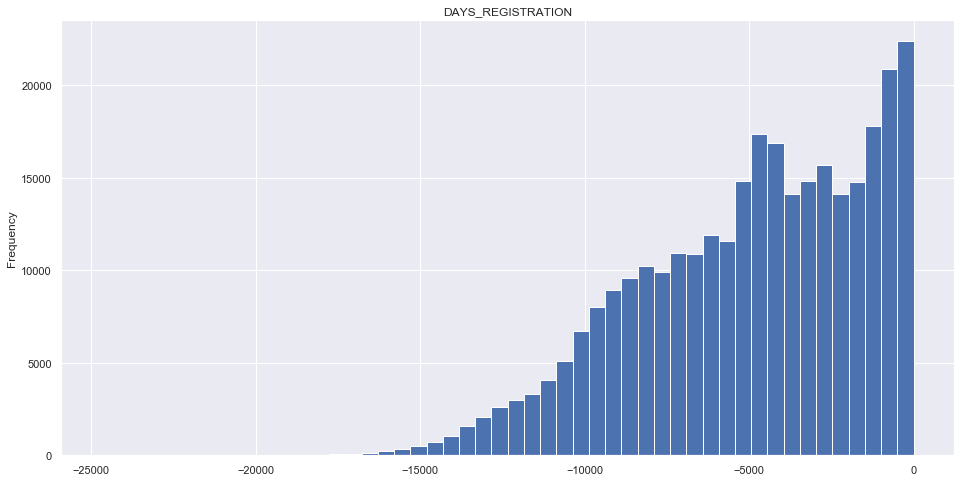

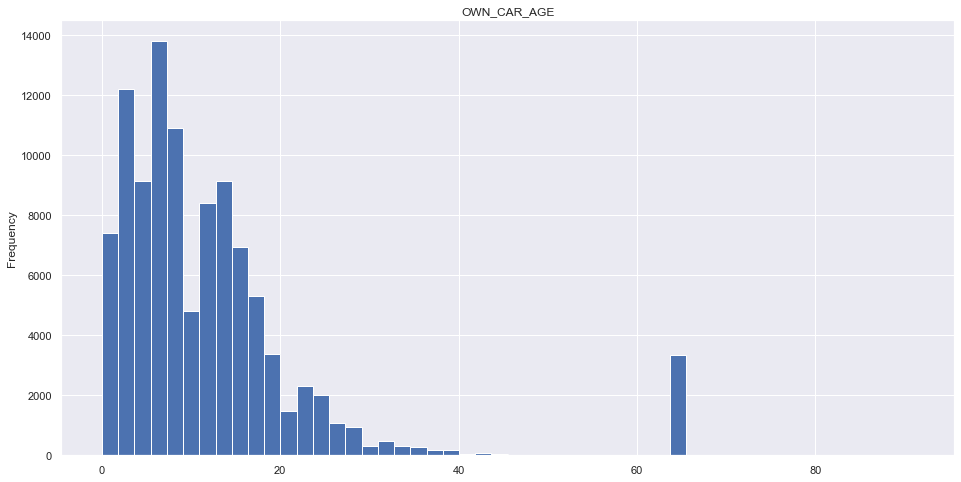

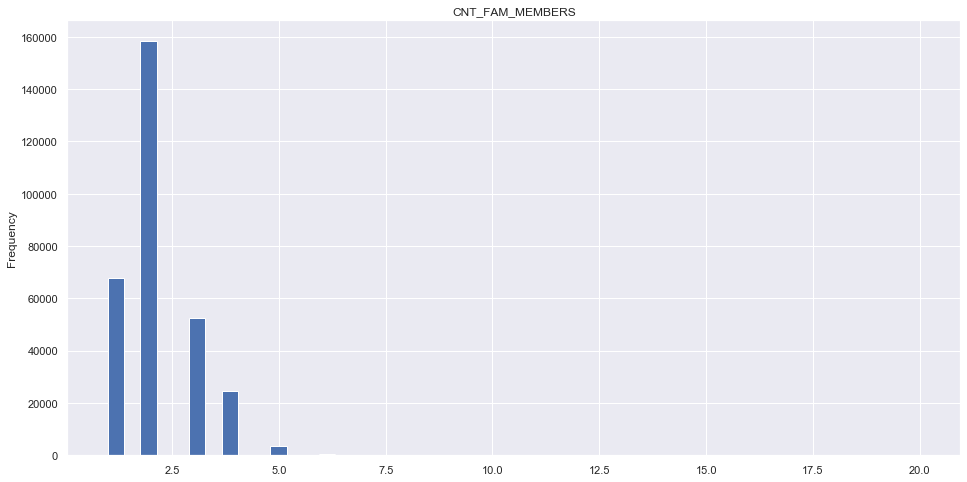

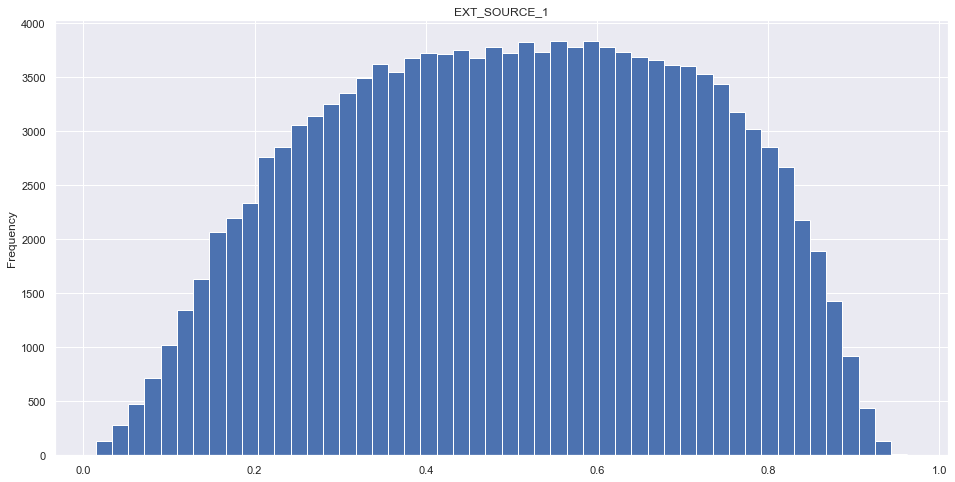

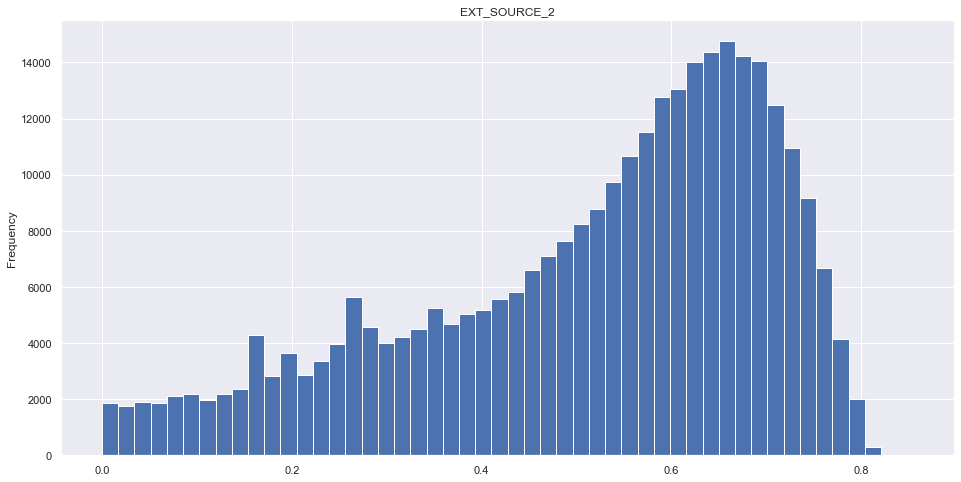

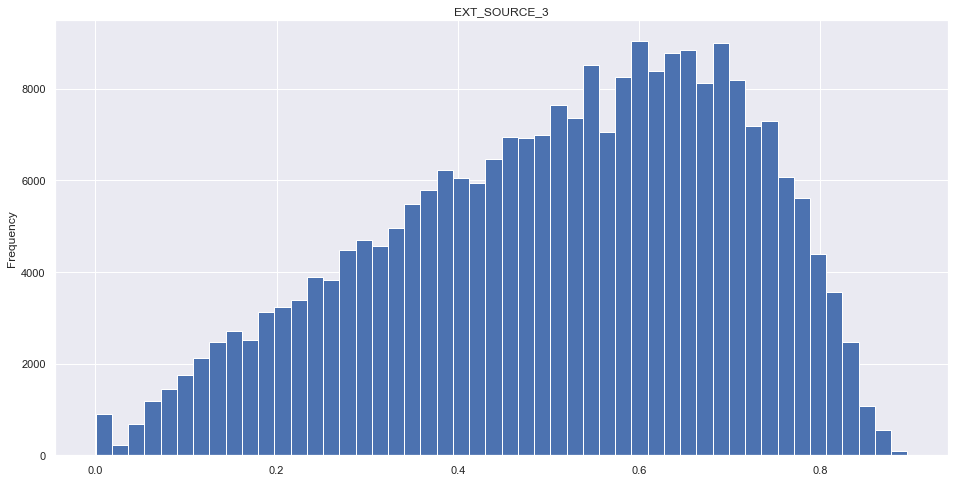

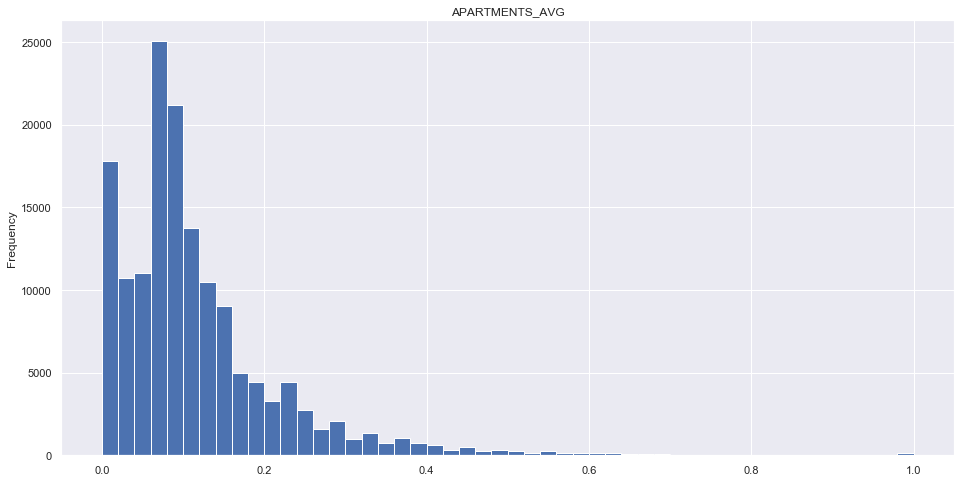

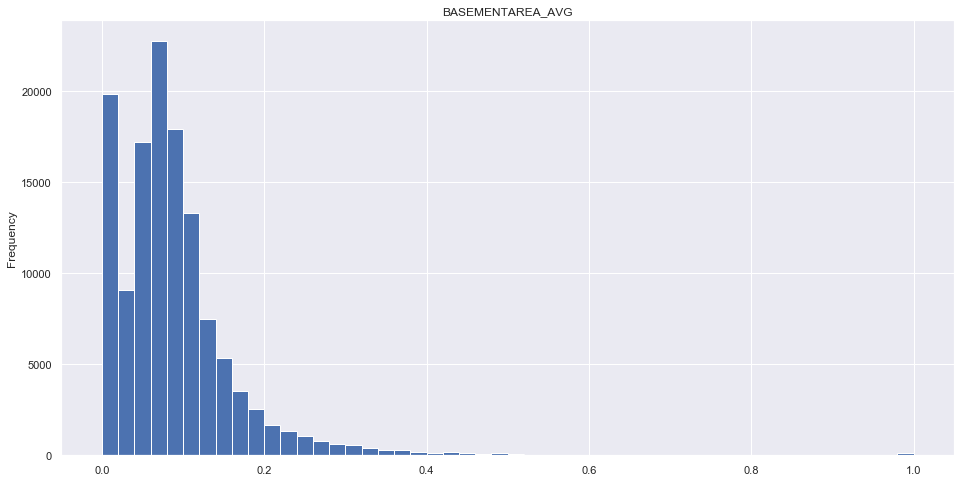

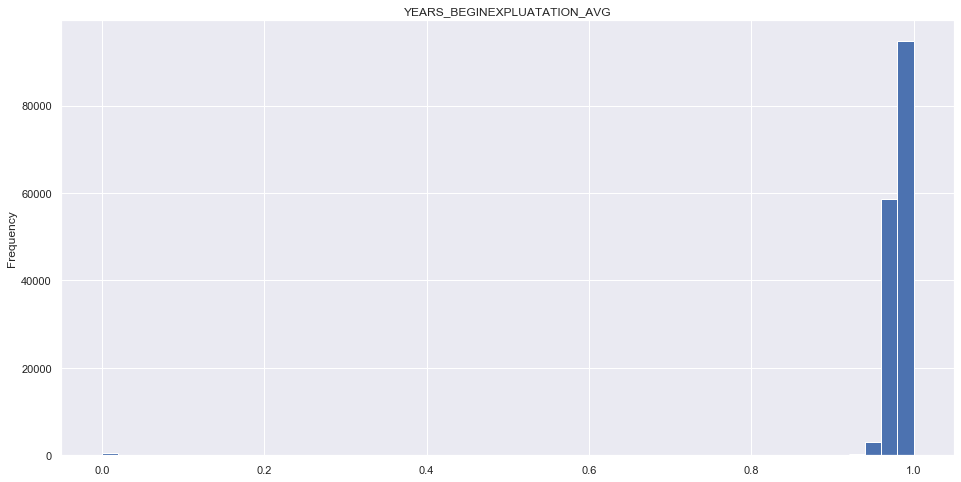

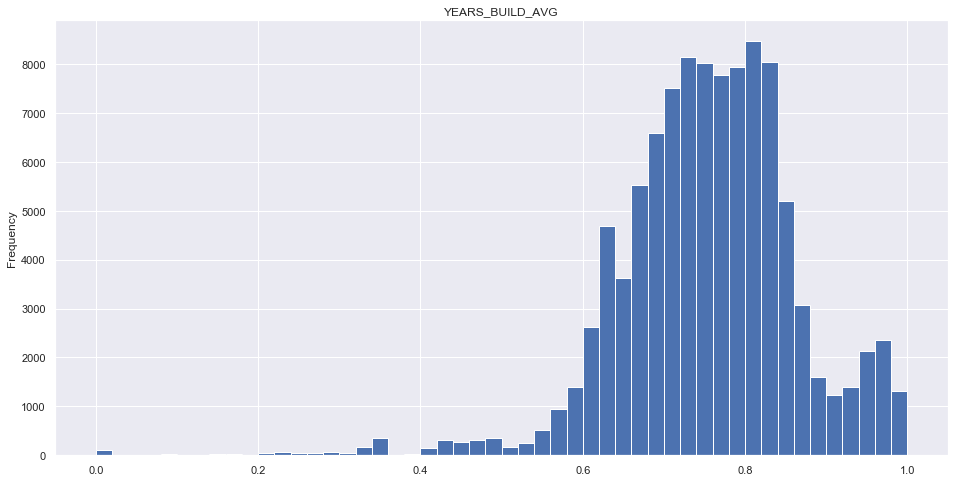

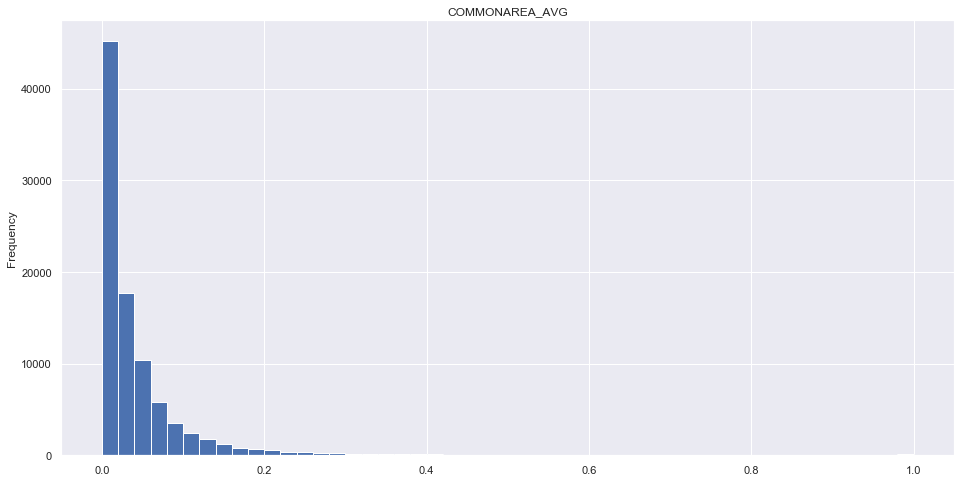

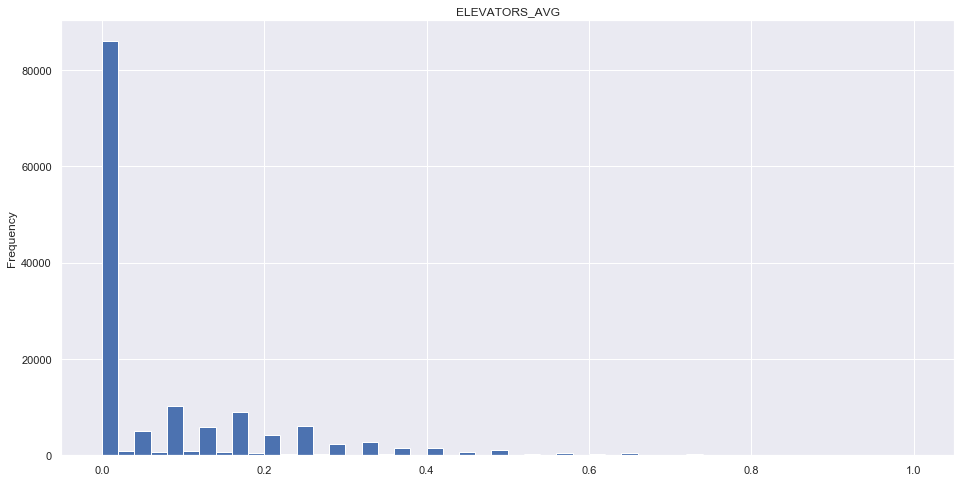

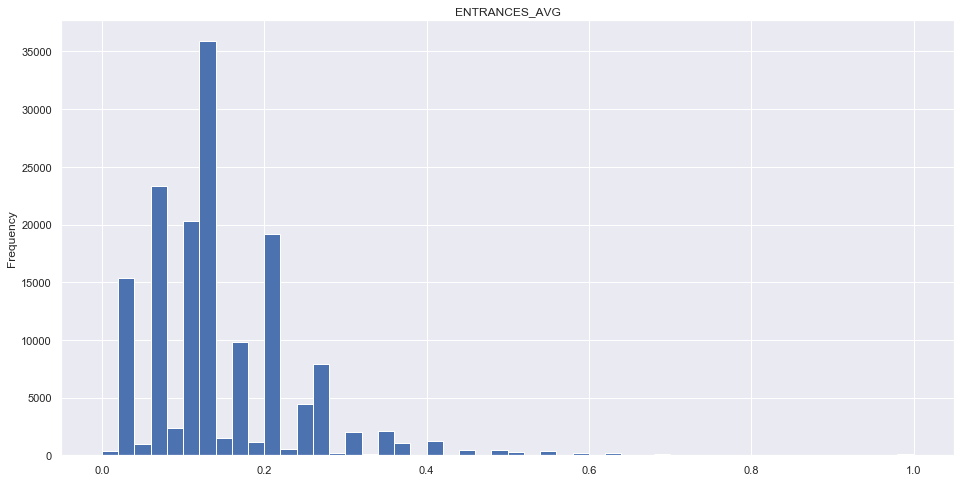

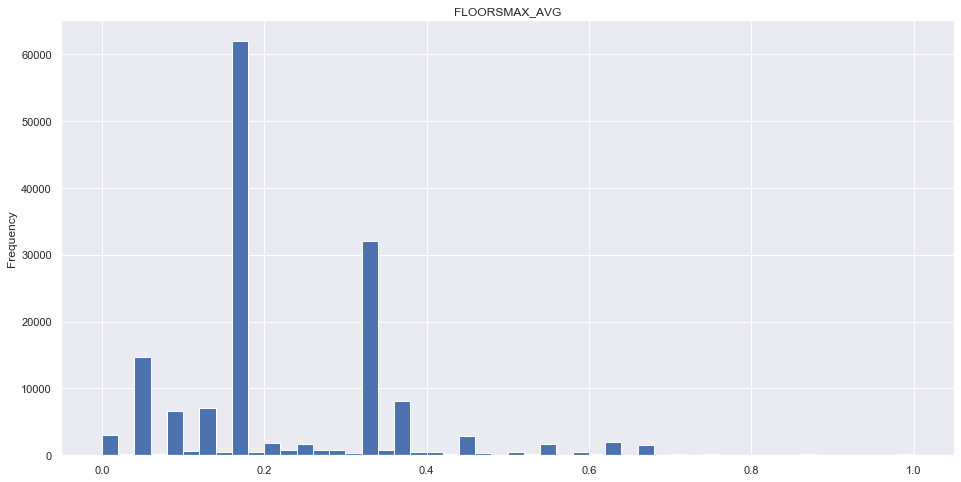

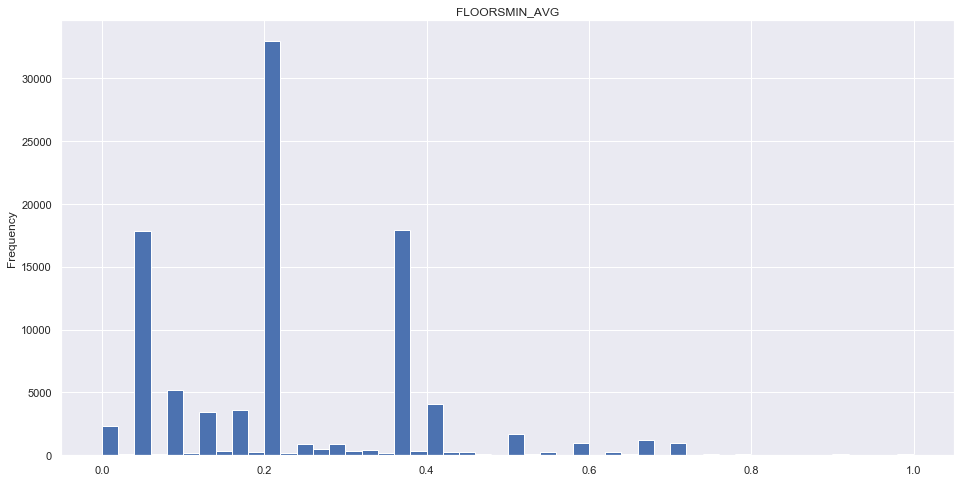

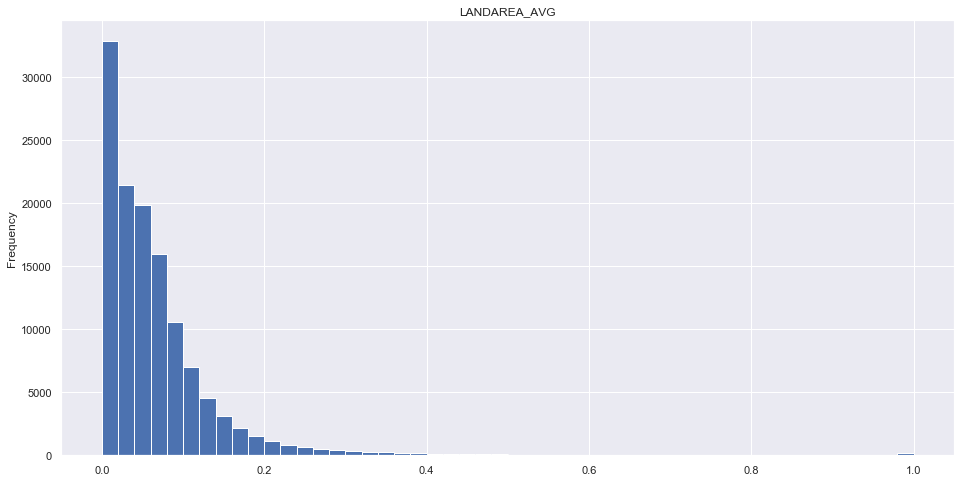

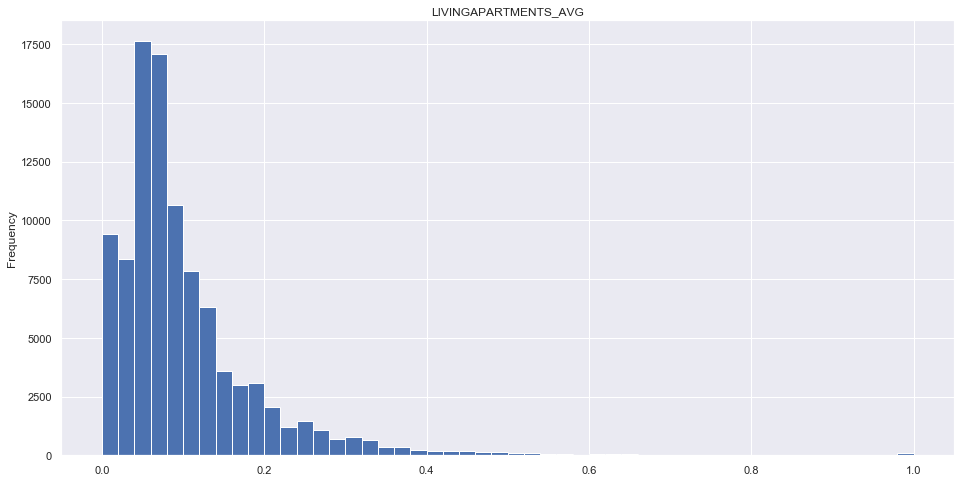

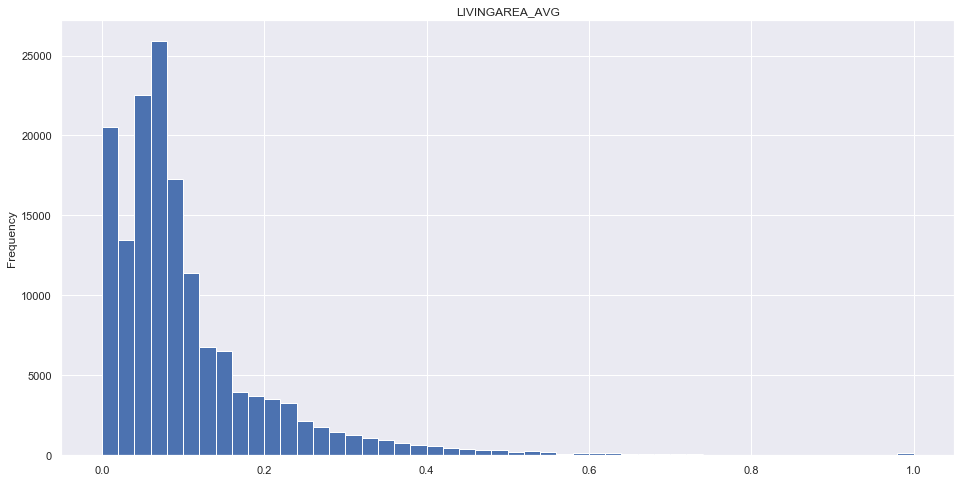

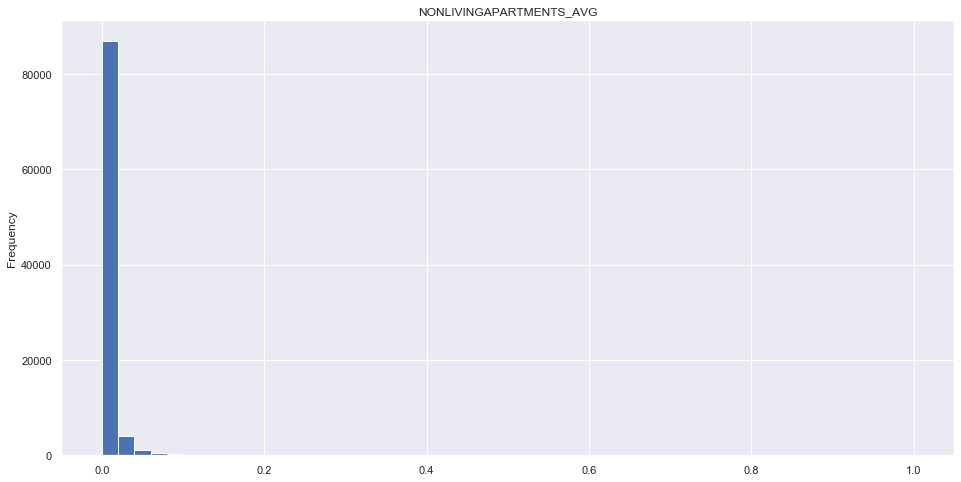

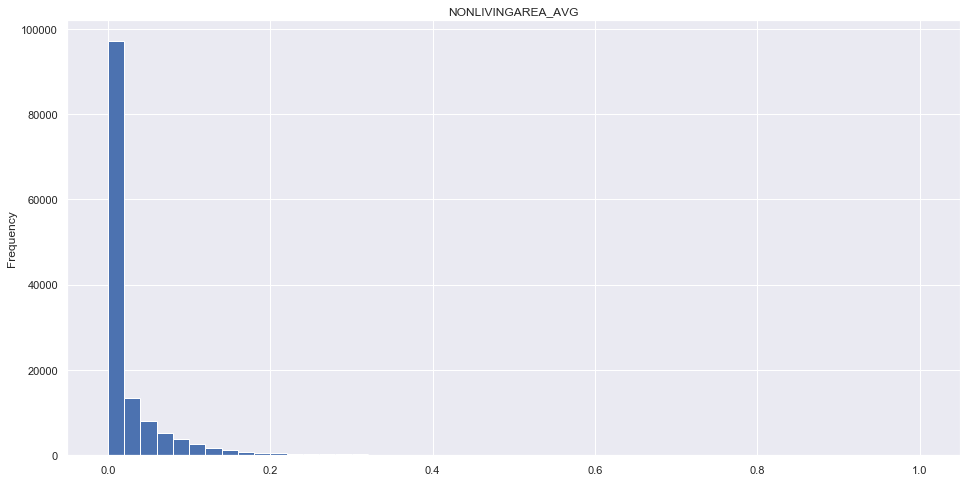

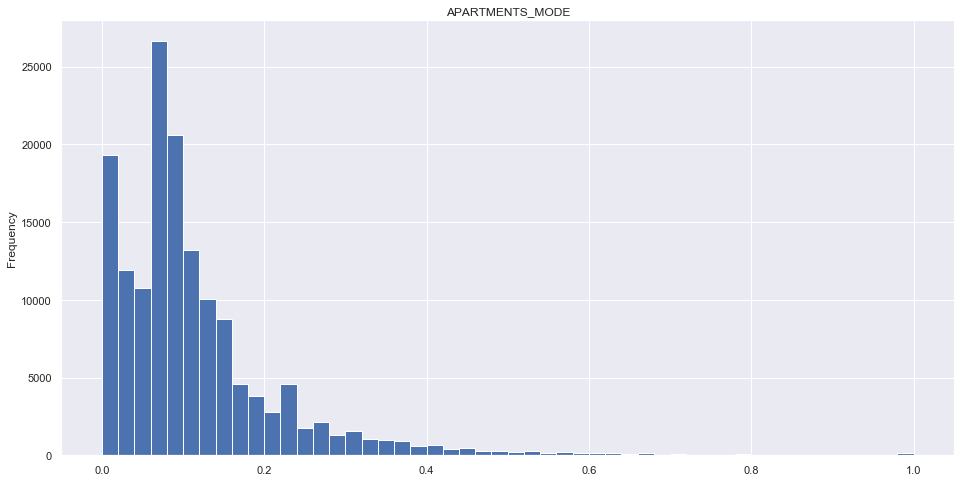

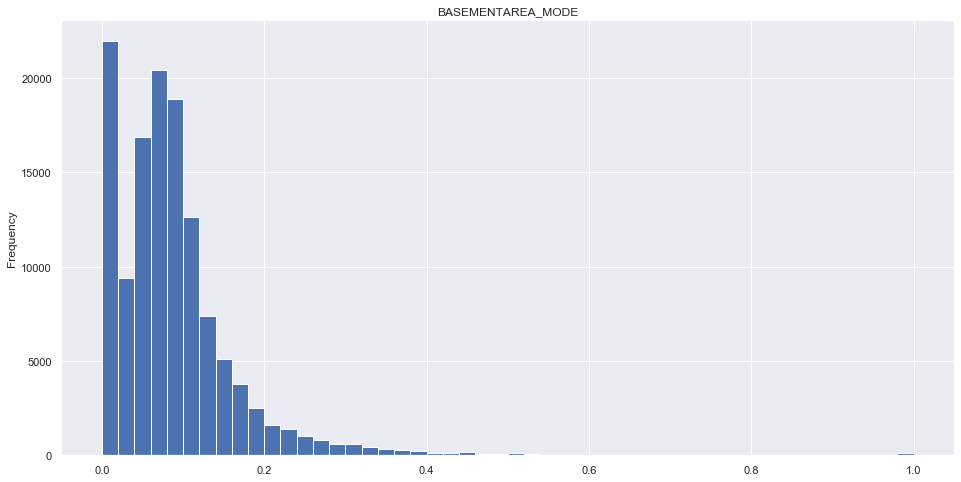

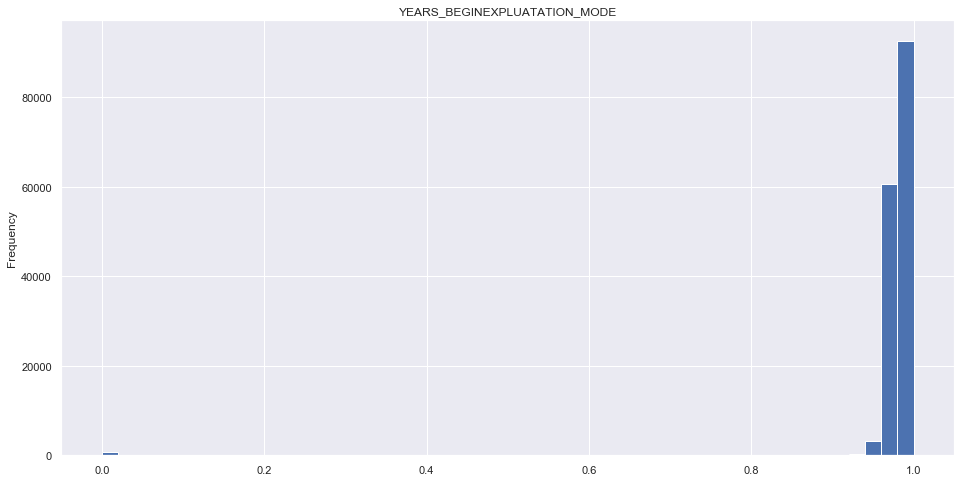

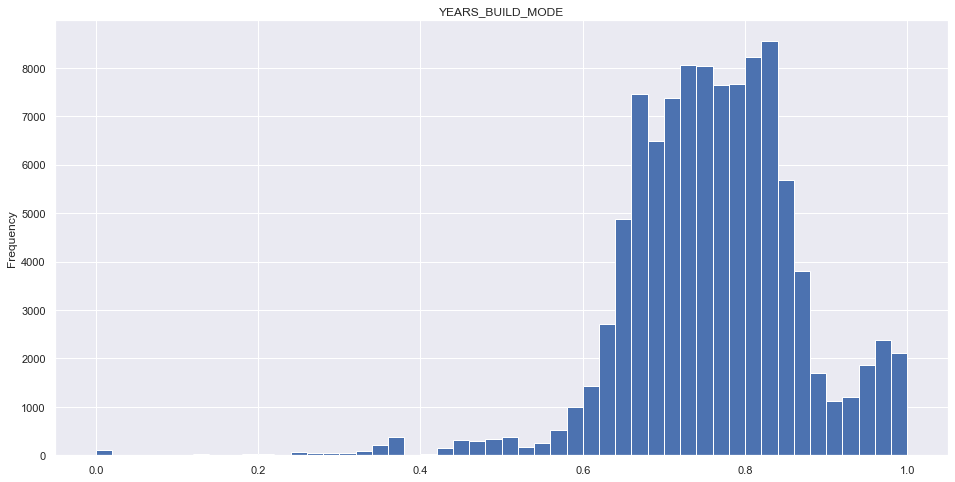

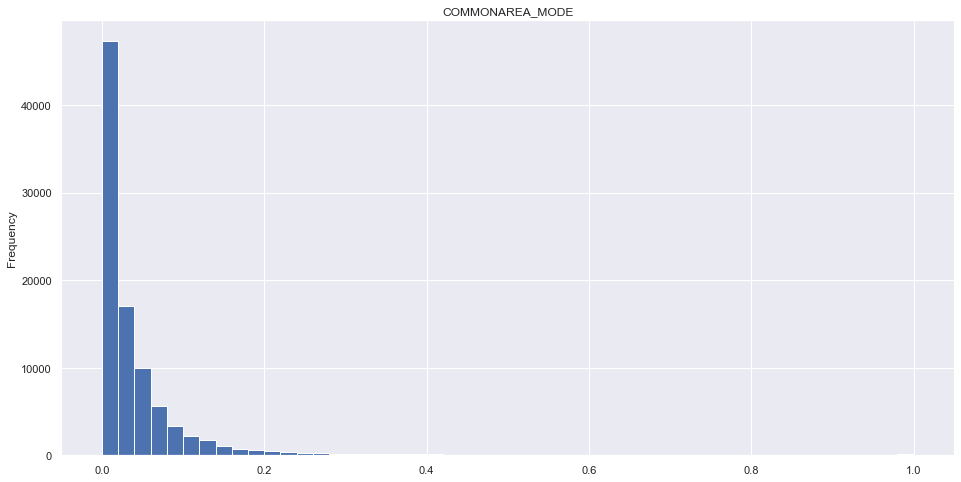

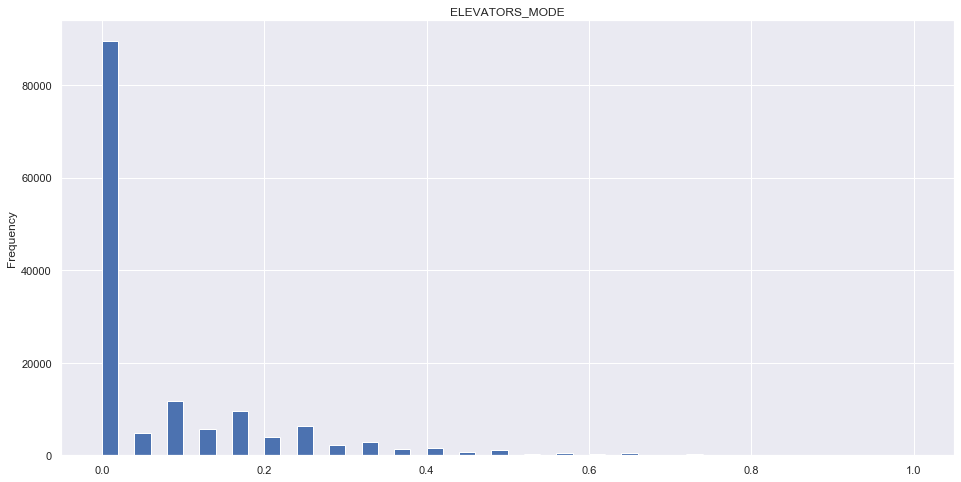

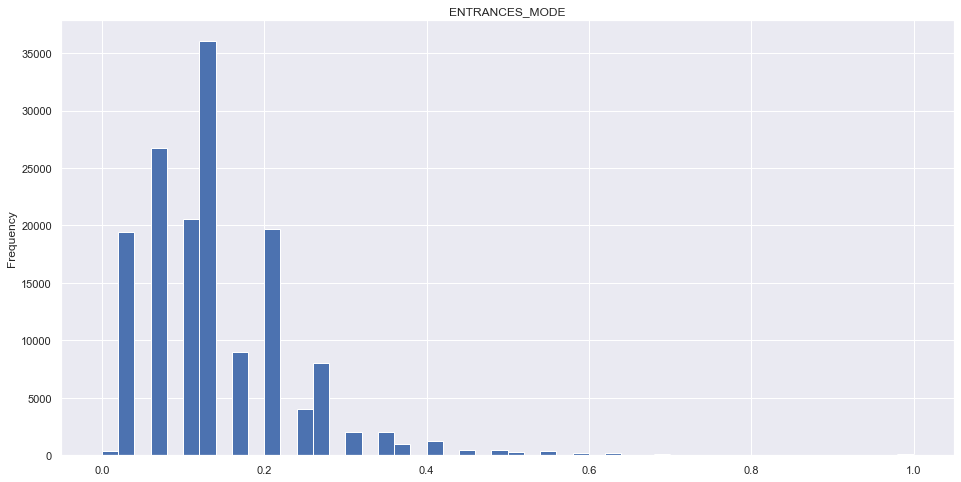

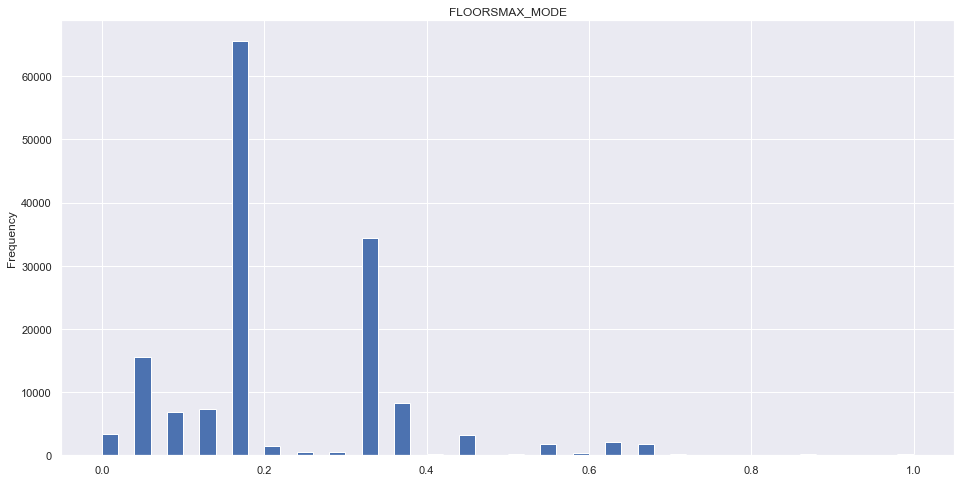

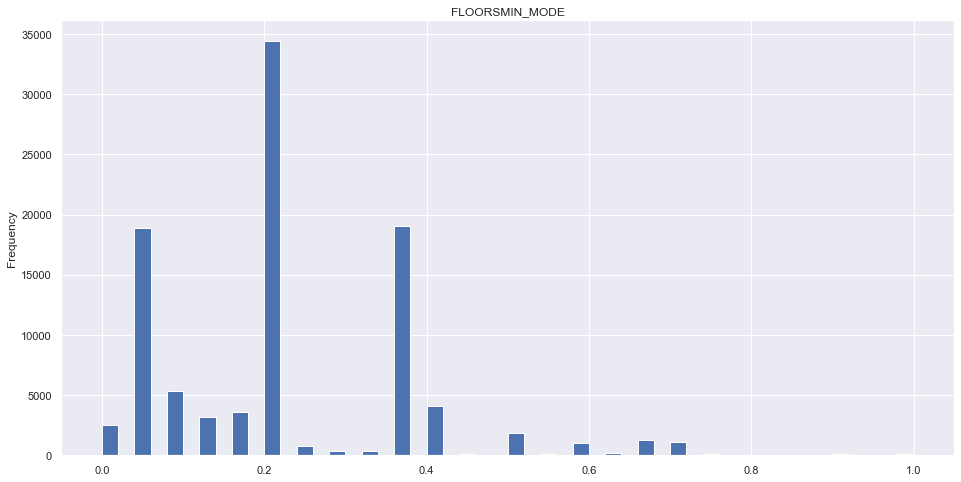

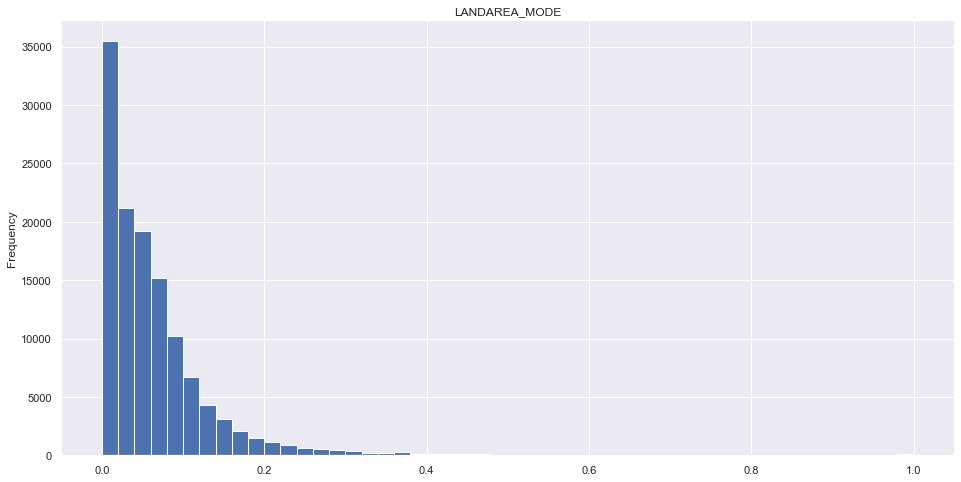

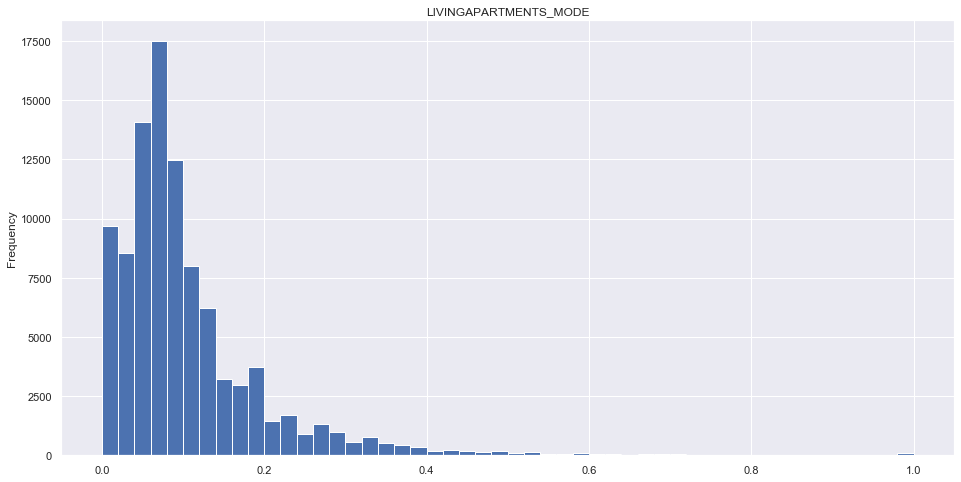

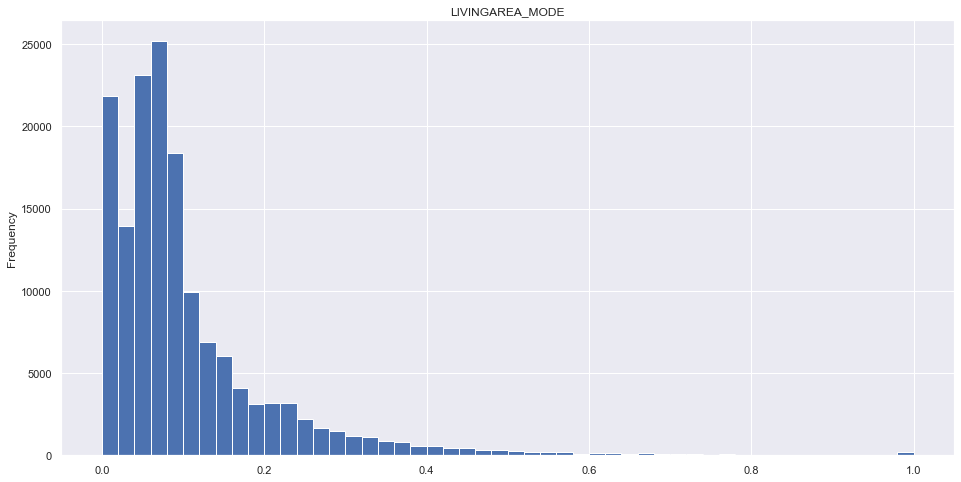

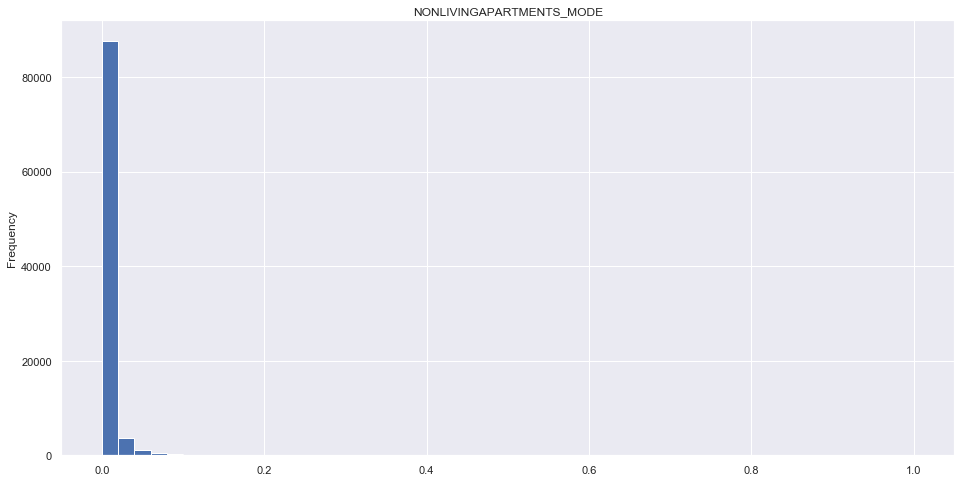

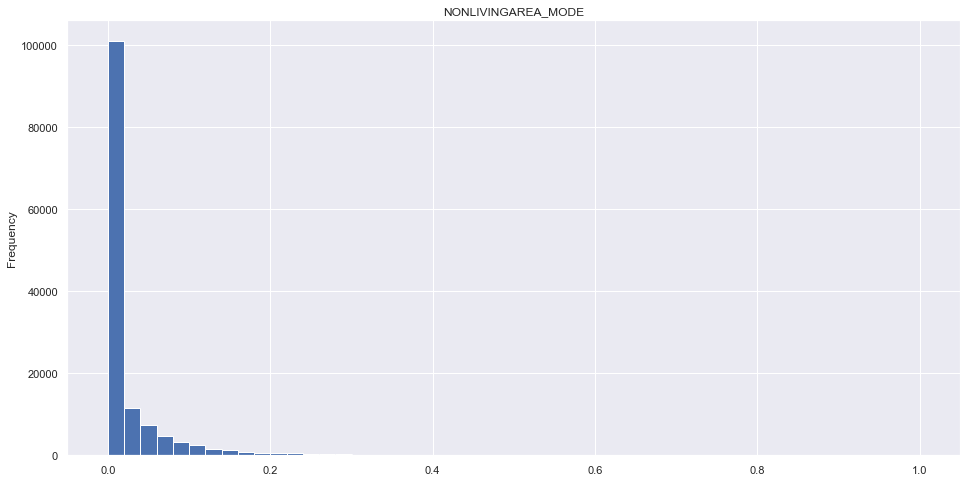

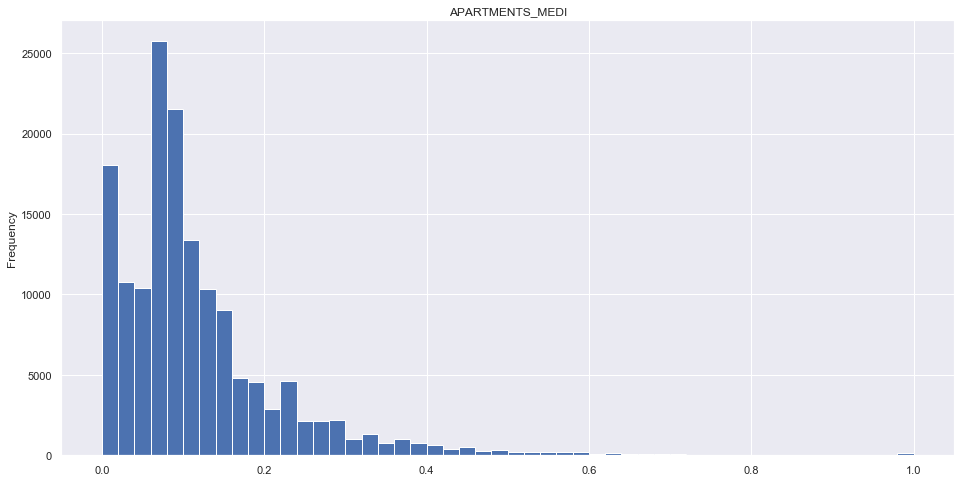

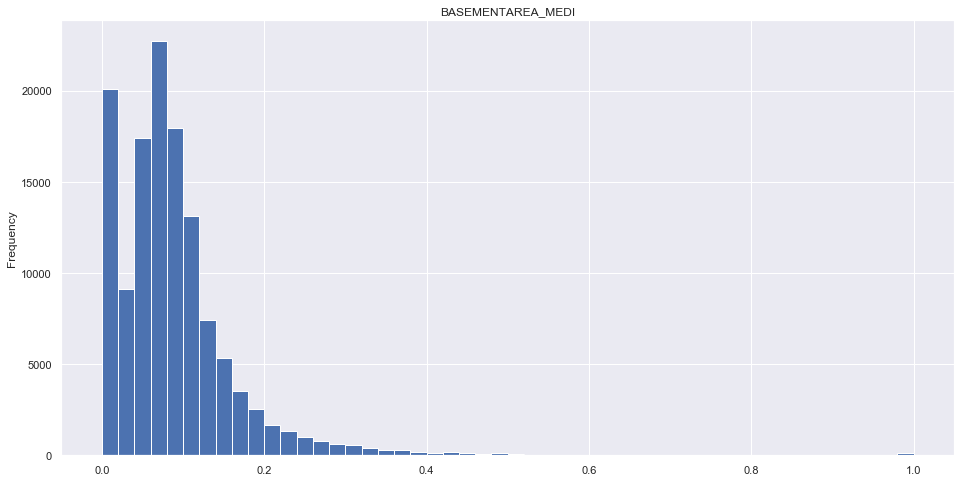

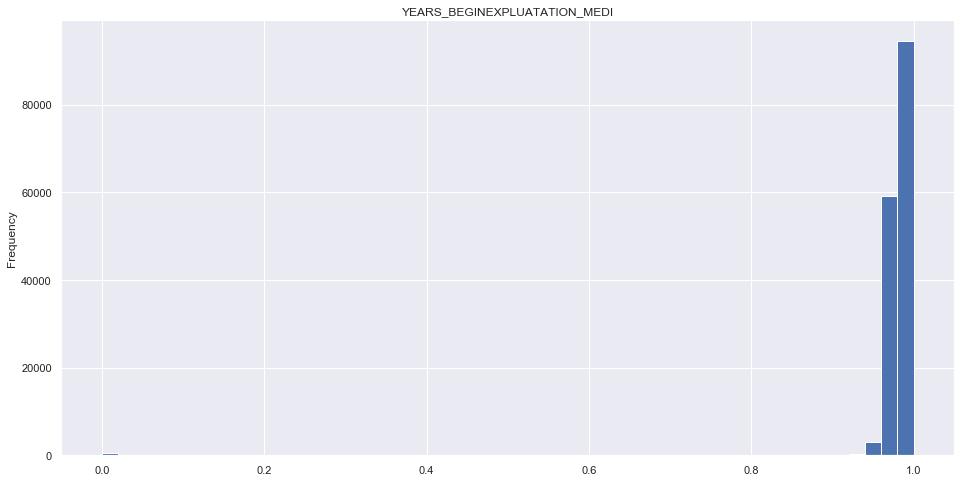

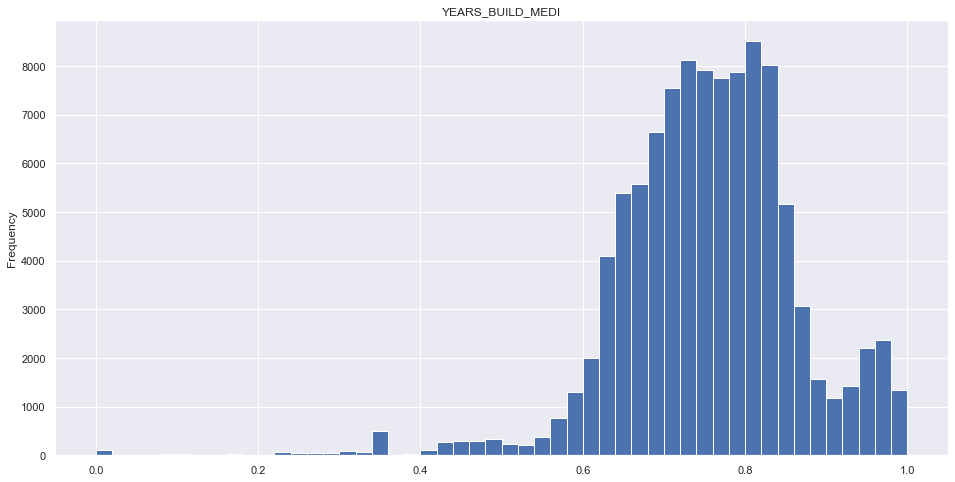

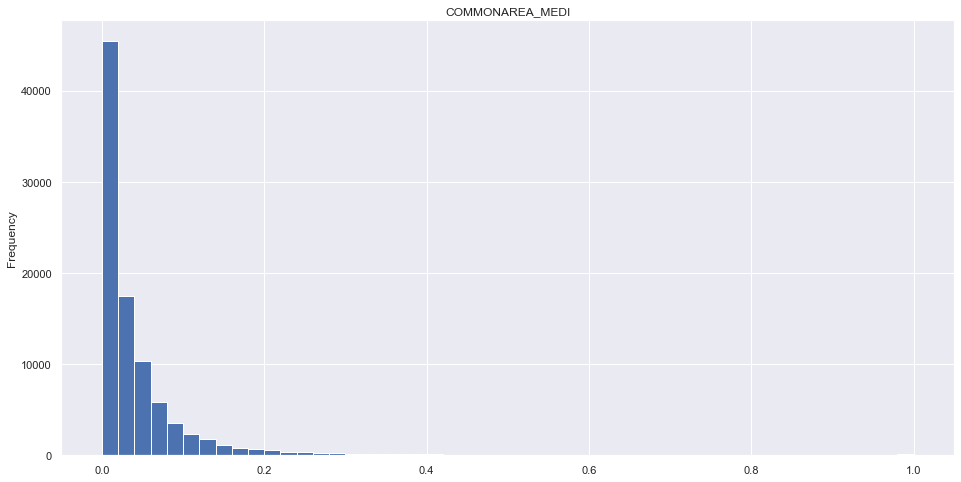

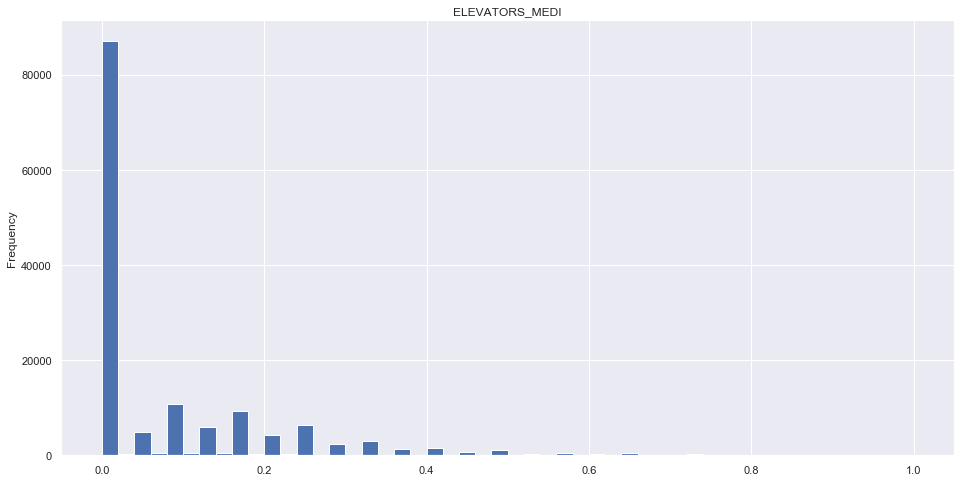

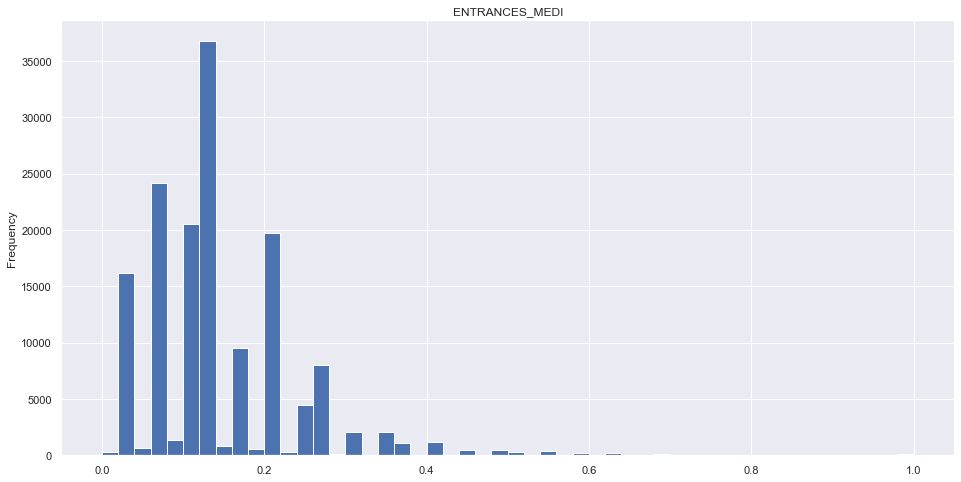

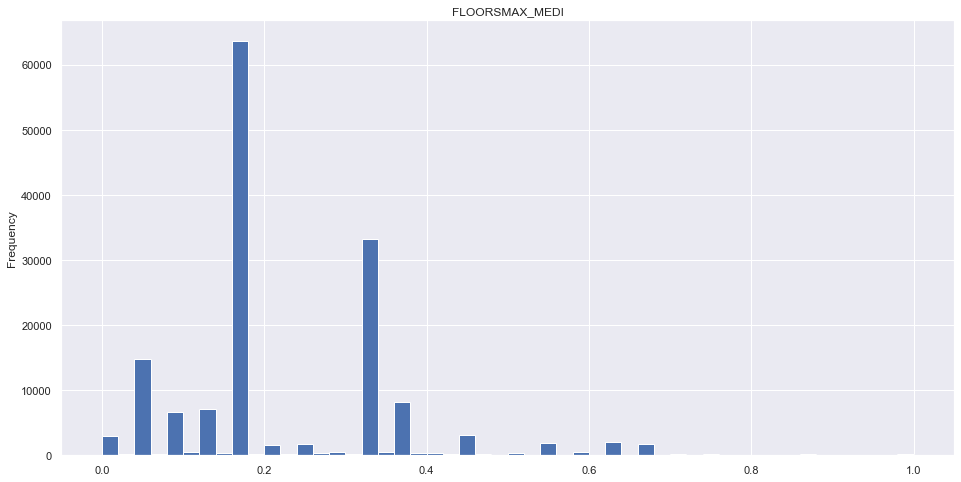

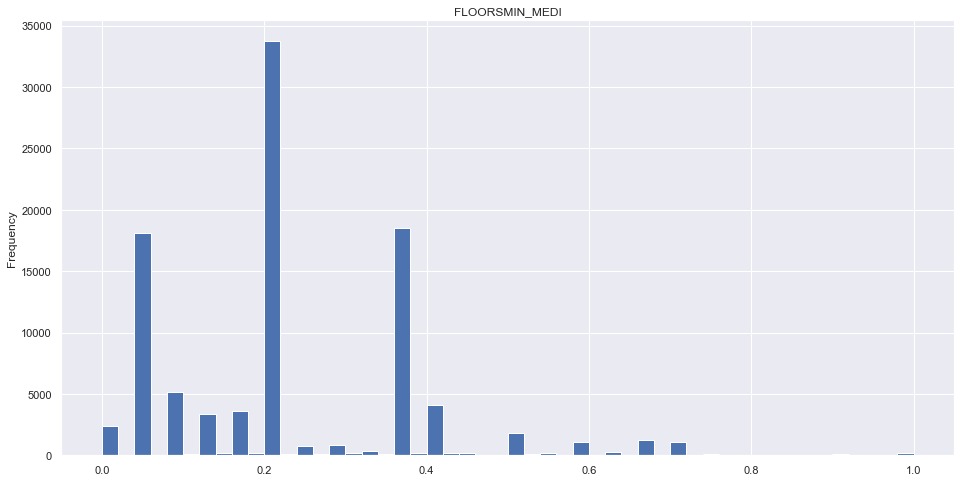

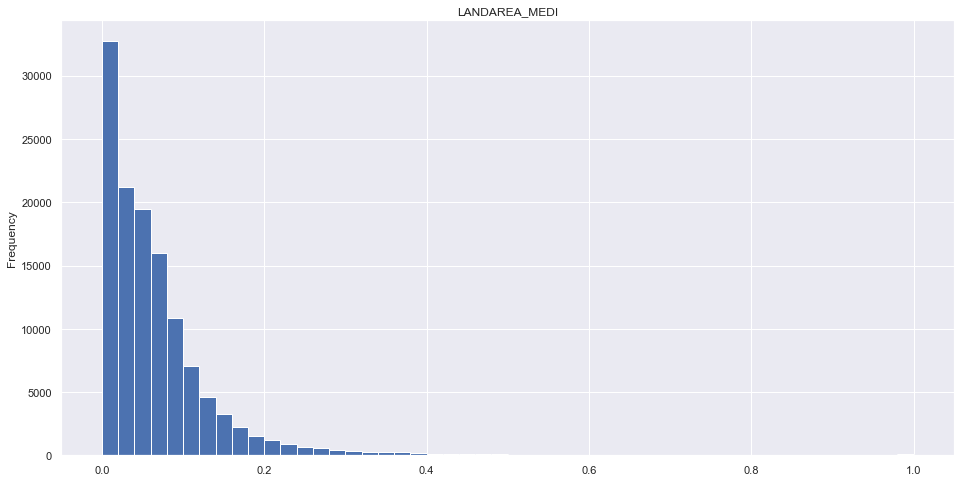

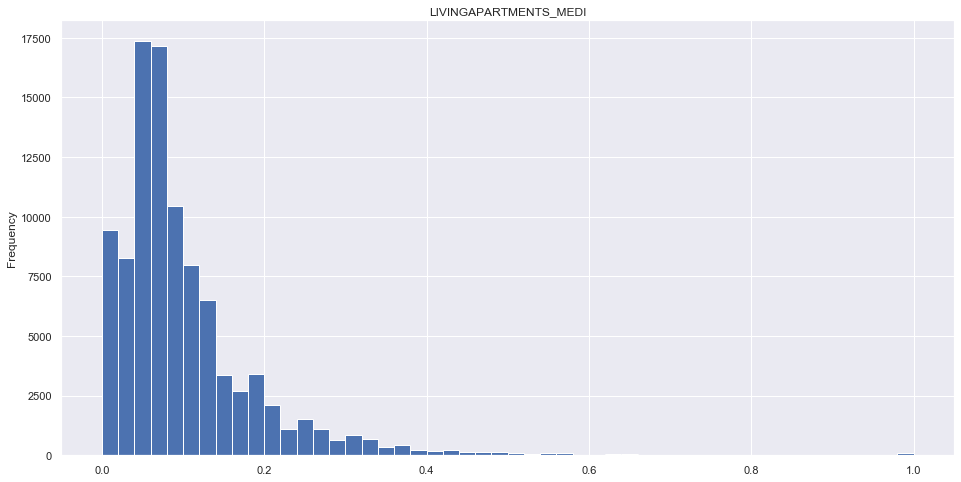

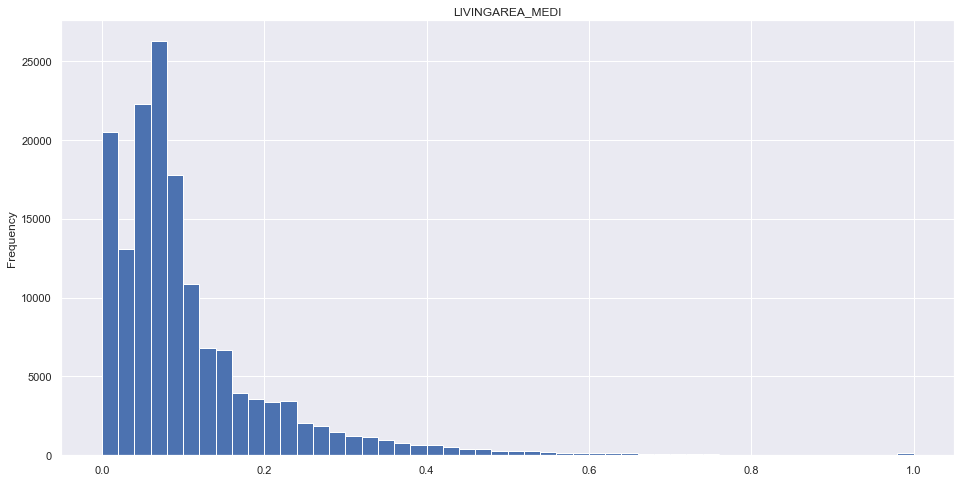

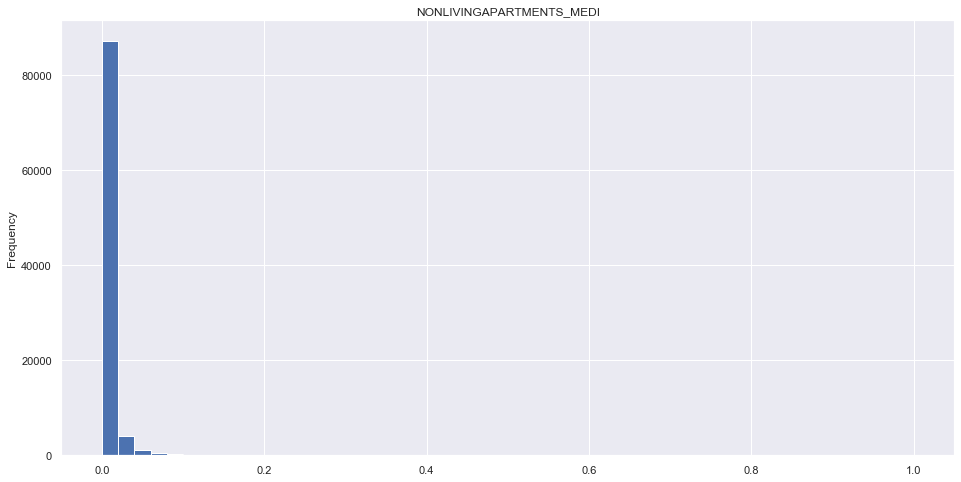

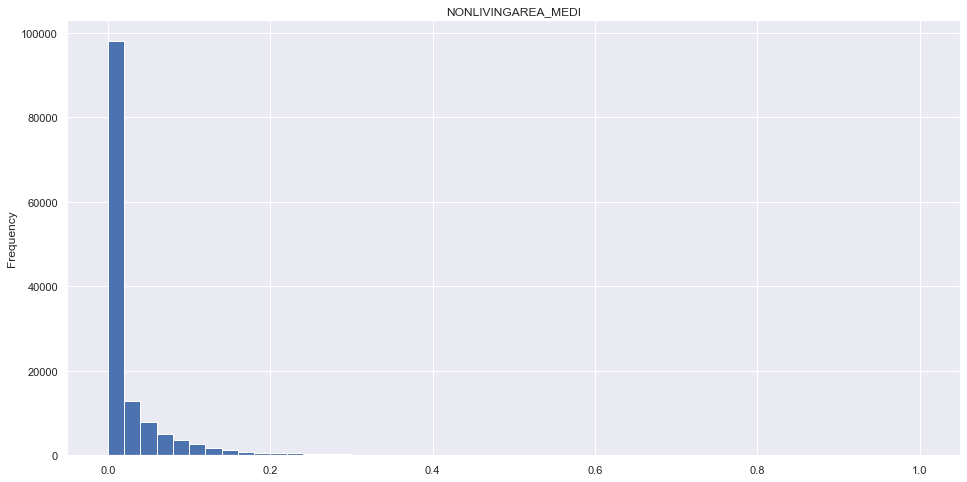

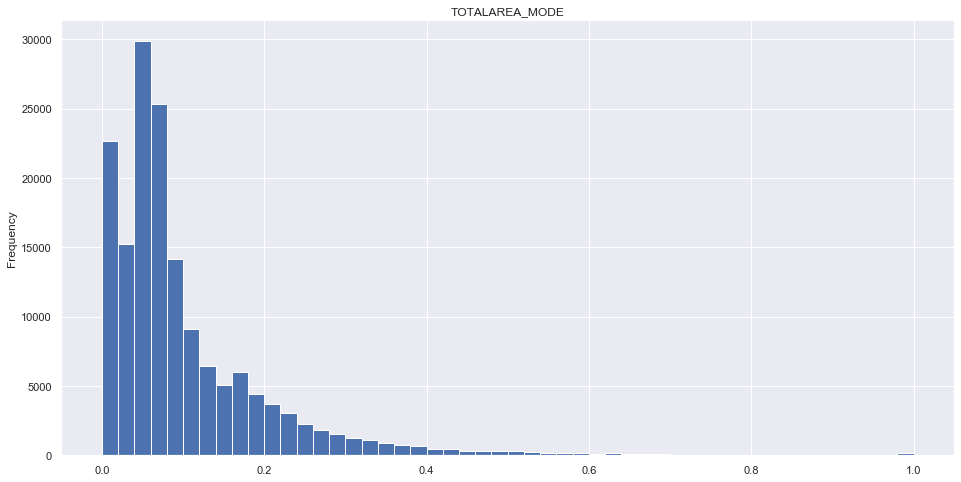

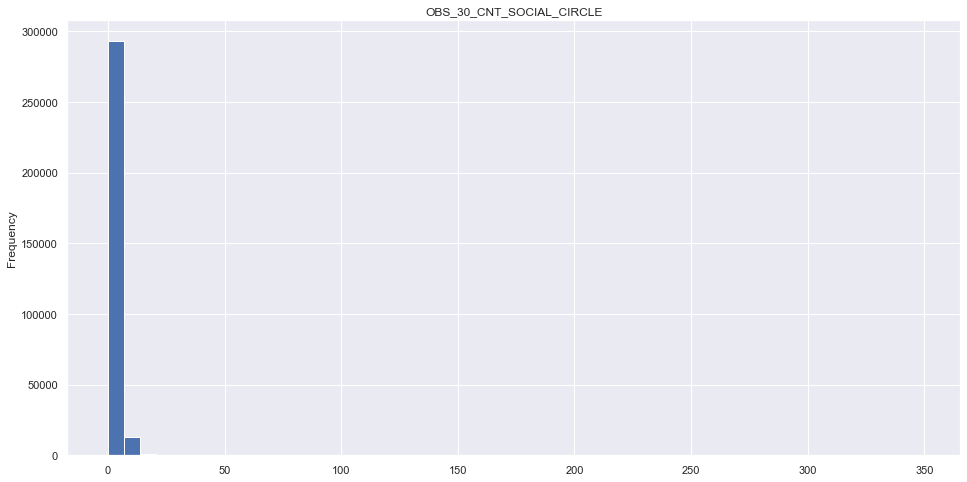

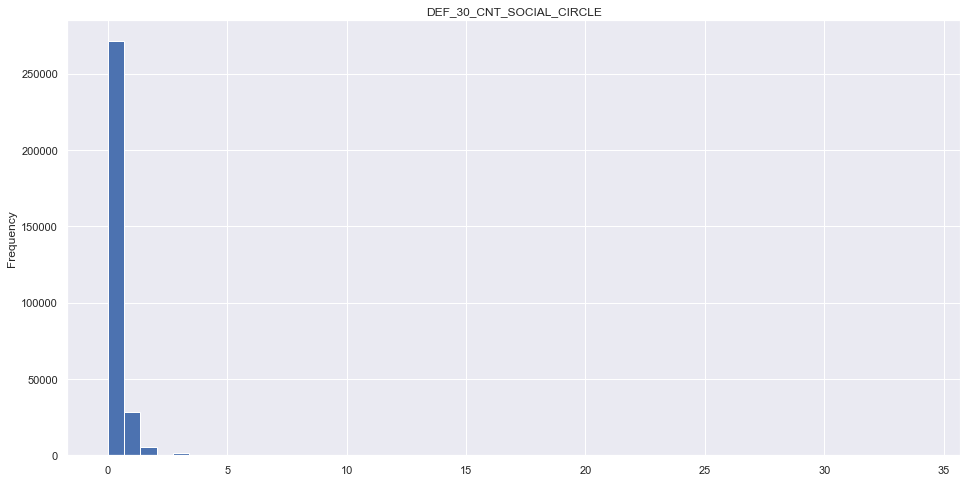

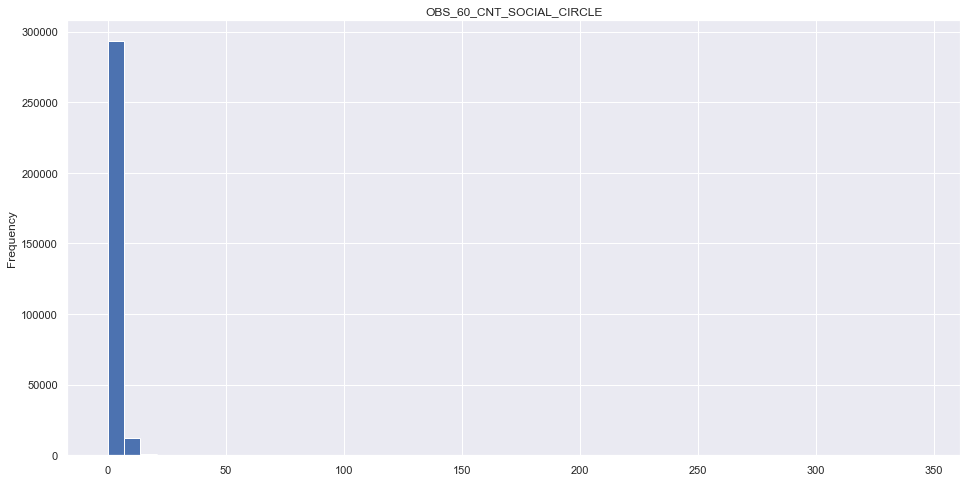

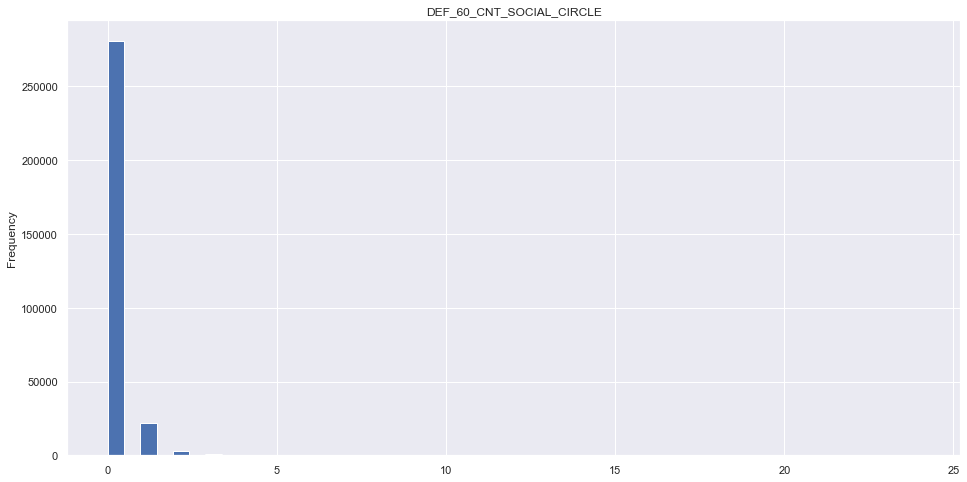

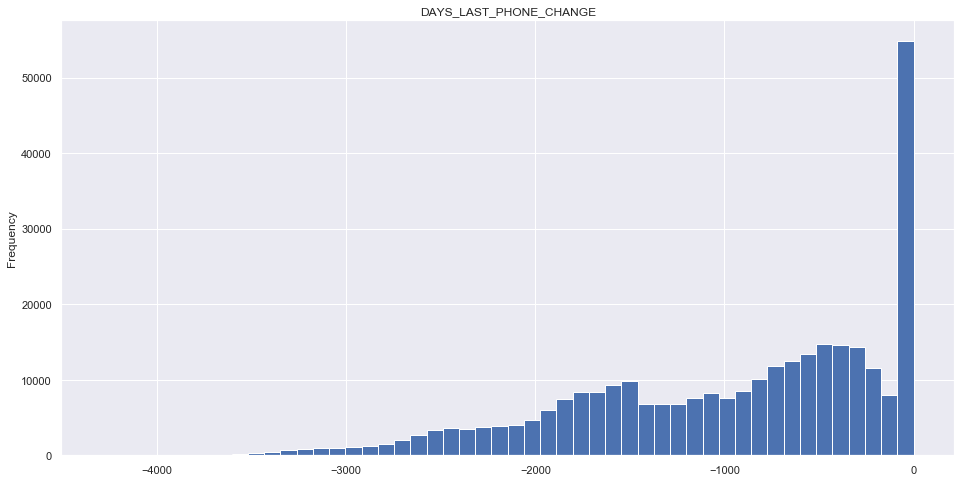

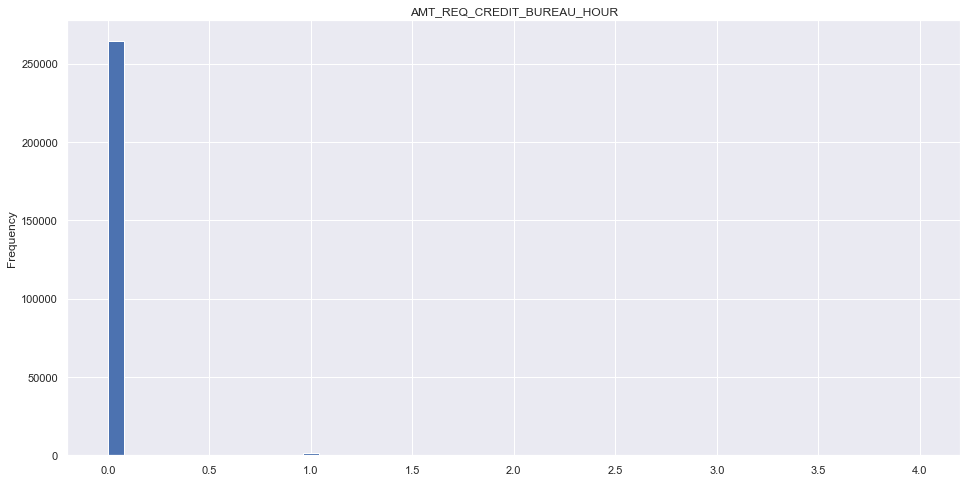

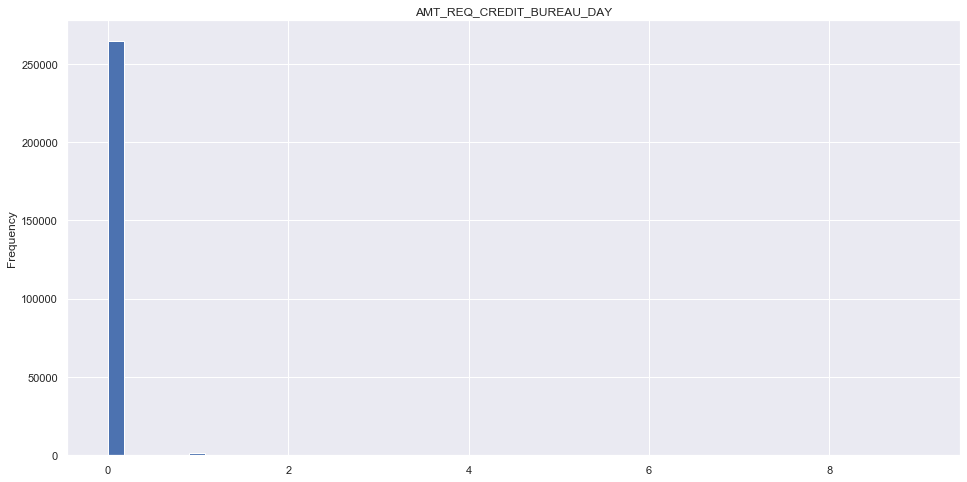

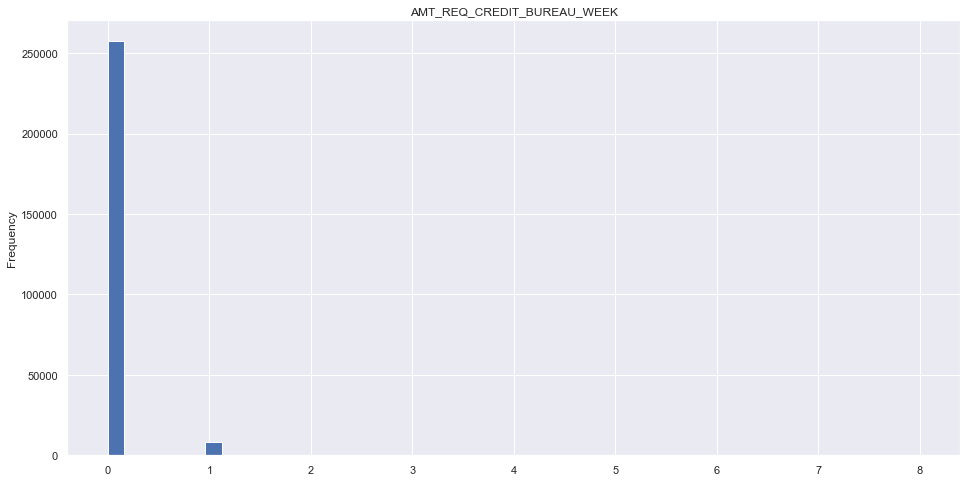

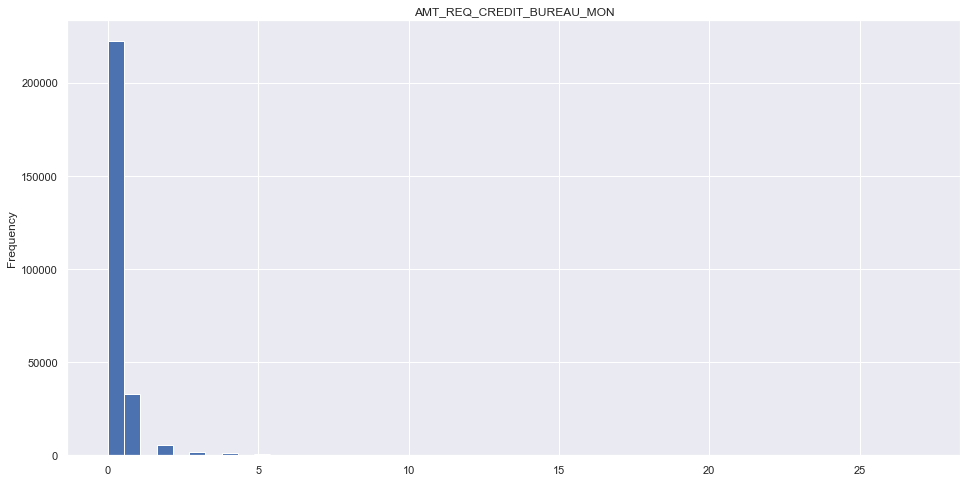

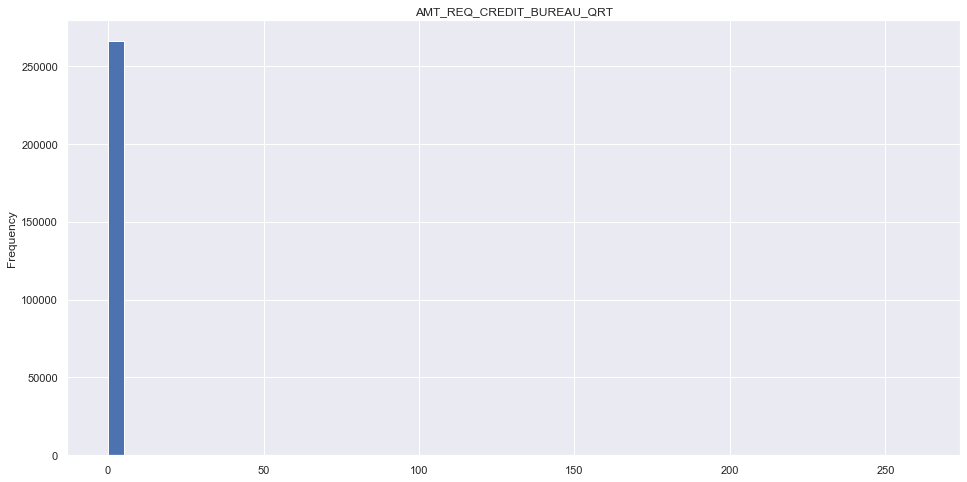

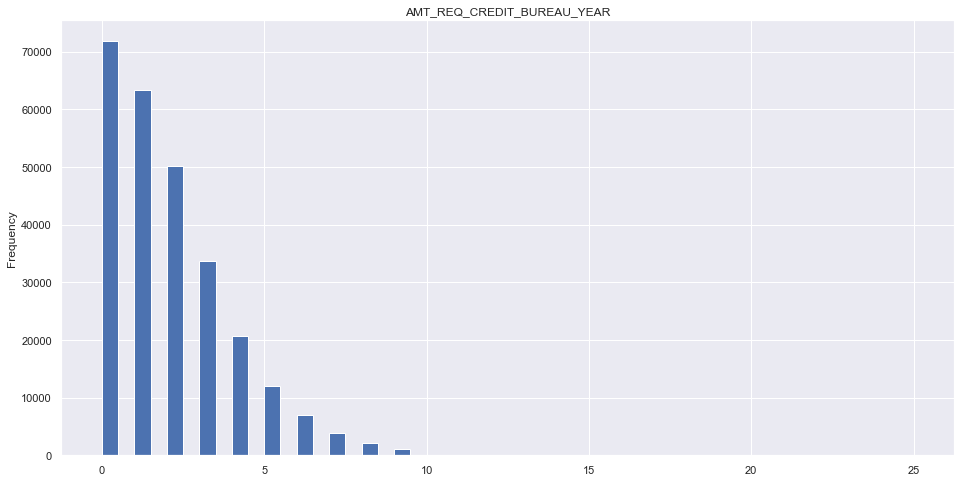

In [21]:
plot_int_hist(HomeCDT_train, type_float64)

In [23]:
#針對 float64 建立 Dataframe 合併目標項
#計算相關係數 
coefficient(HomeCDT_train, type_float64)

C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AMT_INCOME_TOTAL               -0.003982
AMT_CREDIT                     -0.030369
AMT_ANNUITY                    -0.012817
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
DAYS_REGISTRATION               0.041975
OWN_CAR_AGE                     0.037612
CNT_FAM_MEMBERS                 0.009308
EXT_SOURCE_1                   -0.155317
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_3                   -0.178919
APARTMENTS_AVG                 -0.029498
BASEMENTAREA_AVG               -0.022746
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BUILD_AVG                -0.022149
COMMONAREA_AVG                 -0.018550
ELEVATORS_AVG                  -0.034199
ENTRANCES_AVG                  -0.019172
FLOORSMAX_AVG                  -0.044003
FLOORSMIN_AVG                  -0.033614
LANDAREA_AVG                   -0.010885
LIVINGAPARTMENTS_AVG           -0.025031
LIVINGAREA_AVG                 -0.032997
NONLIVINGAPARTMENTS_AVG        -0.003176
NONLIVINGAREA_AV

In [26]:
coefficient(HomeCDT_train, type_Int64)

C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SK_ID_CURR                    -0.002108
TARGET                         1.000000
CNT_CHILDREN                   0.019187
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                 -0.044932
DAYS_ID_PUBLISH                0.051457
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
HOUR_APPR_PROCESS_START       -0.024166
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
LIVE_REGION_NOT_WORK_REGION    0.002819
REG_CITY_NOT_LIVE_CITY         0.044395
REG_CITY_NOT_WORK_CITY         0.050994
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_3                0.044346
FLAG_DOCUMENT_4               -0.002672
FLAG_DOCUMENT_5               -0.000316


C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


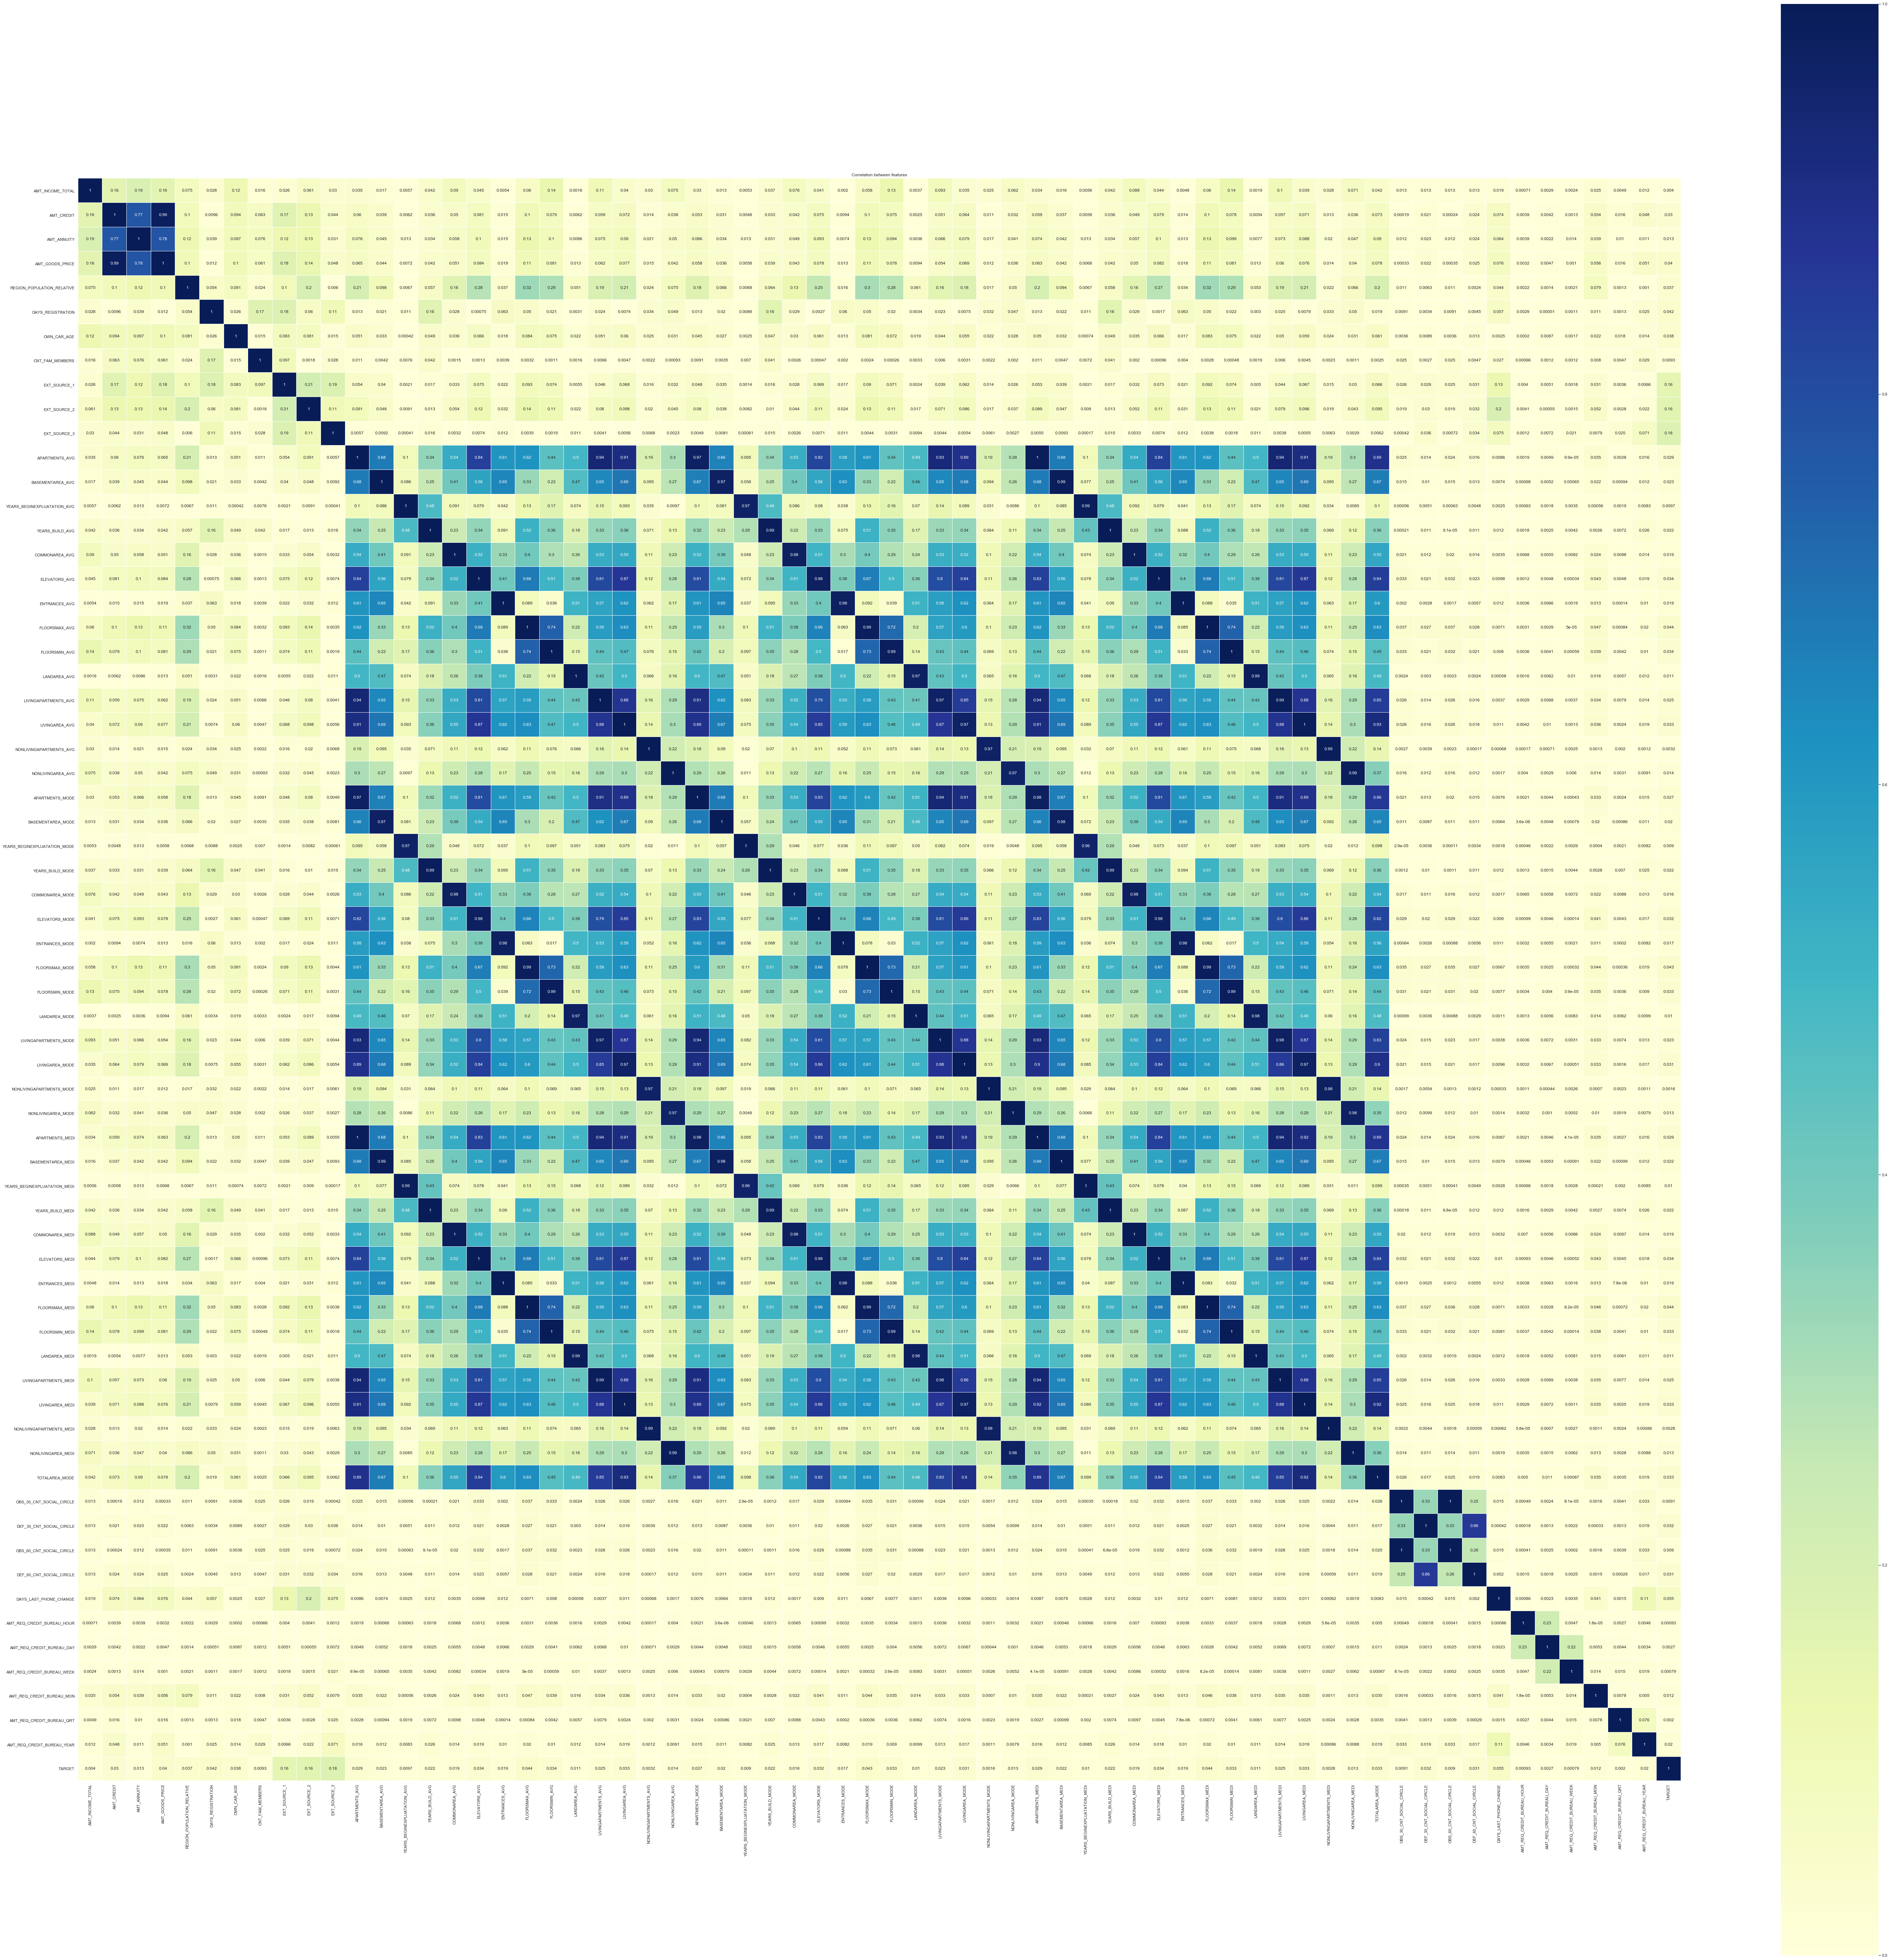

In [24]:
#畫其他和 target 相關係數熱圖
plot_coefficient(HomeCDT_train, type_float64)

C:\Users\Student\.conda\envs\homecdt\lib\site-packages\ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


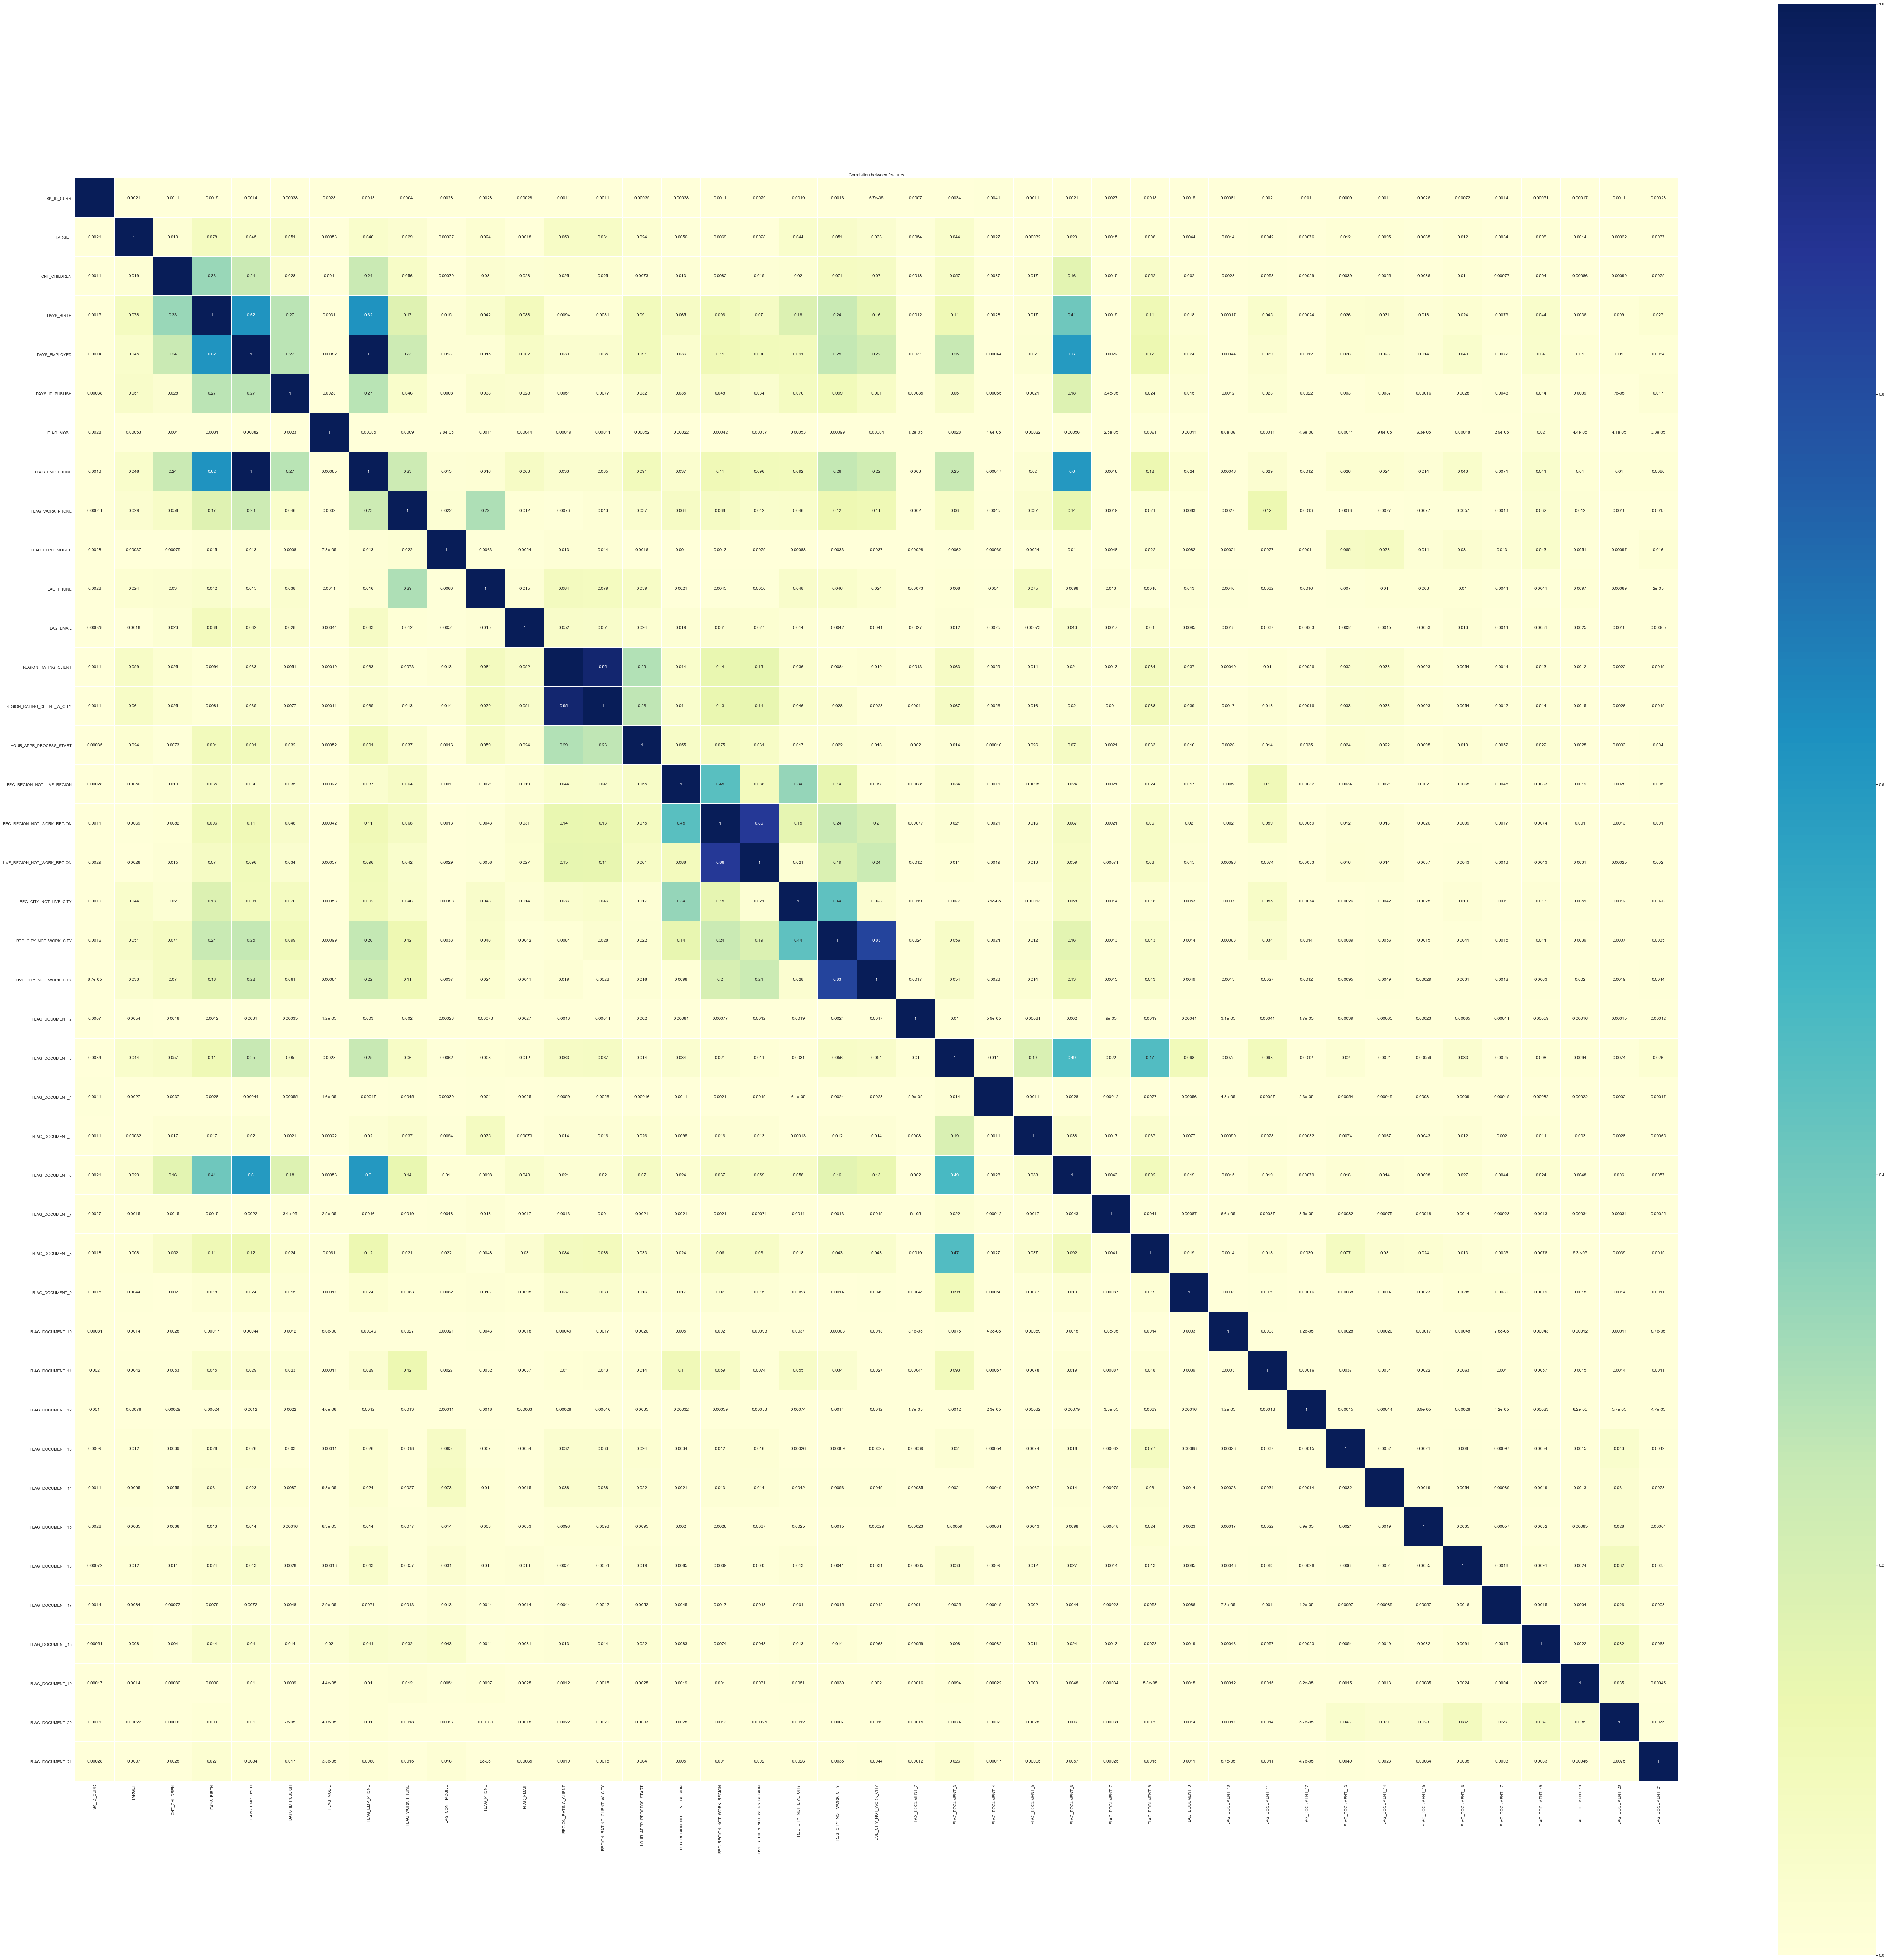

In [27]:
plot_coefficient(HomeCDT_train, type_Int64)

In [ ]:
# object 看各個 object 資料的分布 的圓餅圖
plot_pie_chart(type_object, HomeCDT_train)

In [ ]:
x = HomeCDT_train[type_float64].iloc[:, 2:].values
y = HomeCDT_train['TARGET'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)  # 算出mean, std

train_x = scaler.transform(train_x) # 利用mean, std來將資料變成標準常態分佈
test_x = scaler.transform(test_x)

In [ ]:
train_square = np.hstack([train_x**j for j in range(1,10)]   # 共九項
                                  )
test_square = np.hstack([test_x**j for j in range(1,10)]
                                  )

In [ ]:
regressor = Lasso(max_iter=1E5)
regressor

In [ ]:
# model = regressor.fit(train_square,train_y)
# pred_y = model.predict(train_square)
# r2_score(test_y,pred_y)

In [ ]:
#針對 object 類別做onehot

# HomeCDT_train_object = HomeCDT_train[type_object].fillna(" ")

# labelencoder = LabelEncoder()
# for i in type_object :
#     HomeCDT_train_object[i] = labelencoder.fit_transform(HomeCDT_train_object[i])

# HomeCDT_train_object